Name: Israt

Labpartner(s): Fahmida

In [2]:
#import statements go here
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [1]:
#! /usr/bin/env python
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import matplotlib.pyplot as plt
import numpy as np     #work with numbers
import xarray as xr     #work with arrays and open files
import datetime        #work with date
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
#mpl.rcParams['lines.linewidth'] = 6.0

# Class 7.1

For today's lab you will need to download Davinci Resolve: https://www.blackmagicdesign.com/products/davinciresolve
It will take some time

Today we are going to go over cartopy a bit more, Victoria is giving a demo on how to make movies, and you will start the Pandas course in Datacamp.

Note that due date for Lab 6.2 is on Thursday. Take your time and ask questions.

Also note that your project topic is due 10/13. There is an assignment tab up in moodle to turn this in.

# Warmups 7.1

**W.1** Play around with some map projections in cartopy. 

**W.2** See if you can make a nice map of Antarctica. Bonus if you can label McMurdo Station

(-2800000.0, 2800000.0)

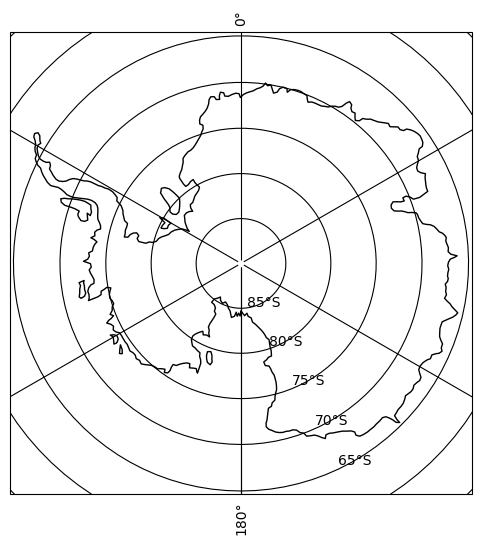

In [27]:
# from https://github.com/thomasteisberg/glaciology-util/blob/master/loading_data/Plotting%20Antarctic%20Datasets.ipynb
crs_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

fig, ax = plt.subplots(figsize=(8,6), facecolor='white', subplot_kw=dict(projection=crs_3031)) # Create our plot

ax.coastlines(resolution='110m', color='k') # Add coastlines
gl = ax.gridlines(draw_labels=True, color='k') # Add gridlines to make latitudes/longitudes
gl.ylabel_style = {'color': 'k'} # The latitudes are shown inside the plot, so they need to be white for visibility

ax.set_aspect('equal')
ax.set_xlim(-2.8e6,2.8e6) # Quick note here: If you use set_(x/y)lim, you're setting the limits in projected coordinates.
ax.set_ylim(-2.8e6,2.8e6) #                  If you prefer, you can use ax.set_extent to set the limits in any coordinate system you want.


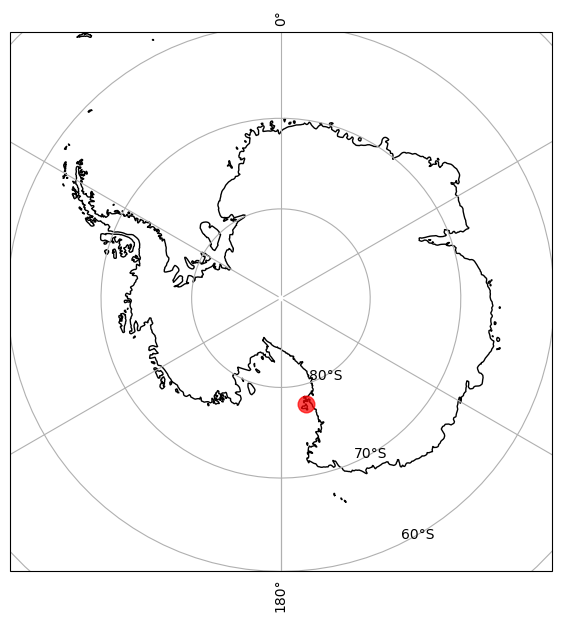

In [21]:
# from https://fabienmaussion.info/climate_system/projects/04_Getting_started_Antarctica.html

#McMurdo Station
# 77 degrees 51 minutes S, 166 degrees 40 minutes E,
lat = -77-51/60
lon = 166+40/60

# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
#z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines()
ax.gridlines(draw_labels=True)

# add in McMurdo
ax.plot(lon, lat, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())

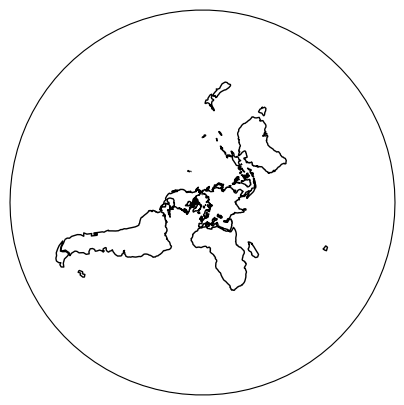

In [7]:
# first attempt 
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo(true_scale_latitude=0))
ax.coastlines(resolution='110m')
#ax.gridlines()

# Lecture 7.1

### Agenda:

- Questions
- Go over some cartopy from last time (6.2 corrected lab on github)
- Movie demo from Victoria (see movie_demo_2024 notebook on github)

### Questions

- See Lab 6.2 corrected versi0n
- See movie_demo_2024 notebook

# Lab 7.1

**E.1** Complete Data Manipulation with Pandas Ch 1-2 in datacamp. I'm assigning all of this course to the class, as many of you have .csv type data that works well with Pandas. If you don't have data that Pandas is useful for, come see me and we can talk about an alternate assignment.


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [ ]:
Chapter 01: Part 01:
.head() returns the first few rows (the “head” of the DataFrame).
.info() shows information on each of the columns, such as the data type and number of missing values.
.shape returns the number of rows and columns of the DataFrame.
.describe() calculates a few summary statistics for each colu
.values: A two-dimensional NumPy array of values.
.columns: An index of columns: the column names.
.index: An index for the rows: either row numbers or row names.mn.

In [ ]:
Chapter 01: part 02:
Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

print(homelessness_fam.head
Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True,False])
# Print the top few rows
print(homelessness_reg_fam.hea
Select the individuals column
individuals = homelessness["individuals"]

print(individuals.head
Select the state and family_members columns
state_fam = homelessness[["state","family_members"]]

print(state_fam.head
ind_state = homelessness[["individuals", "state"]]

print(ind_state.head(

# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"]>10000]

# See the result
print(ind_gt_
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"]=="Mountain"]

# See the result
print(mountain_reg.hea
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"]<1000)&(homelessness["region"]=="Pacific")]

# See the result
print(fam_lt_1k

Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)


In [ ]:
Chapter 01: Part 03:
Add total col as sum of individuals and family_members
homelessness["total"]=homelessness["individuals"]+homelessness["family_members"]
# Add p_homeless col as proportion of total homeless population to the state population
homelessness["p_homelessness"]=homelessness["total"]/homelessness["state_pop

# See the result
print(homele
Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]
# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"]>2

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=Fse)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_pe10k"]]



In [ ]:
# chapter 02: part 01: Summary statistics
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l","unemployment"]].agg(iqr))
# Using multiple functions together
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

# Cumulative statistics
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["cum_weekly_sales"].max()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])


In [ ]:
# Chapter 02: part 02: Dropping the duplicates
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates("date")

# Print date col of holiday_dates
print(holiday_dates["date"])



In [ ]:
# chapter 02: part 03
# Counting categorical variable
# Count the number of stores of each type
store_counts = store_types["type"].value_counts
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of stores for each department and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of stores in each department and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)
# Calculation with group_by
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

# Multiple group summary statistics
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment","fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

In [ ]:
#chapter 02: part 04: Pivoting on one variable
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# pivoting multiple variables
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales",index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)
# Fill in missing values
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))
# sum values with pivot_table
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))


This week's project:

**E.3** Make two data animations using both the methods that Victoria demonstrated. You can use some of the model data we have been looking at, or animate a plot of your data, or whatever scientific thing you like. The goal here is to get familiar with the animation methods and tell a story using data. You will present this to the class next Tuesday (remember 10/17 is a holiday). Add your animations to this ppt: https://lsu.box.com/s/e99nkcr3nyds4r4gswilxgol5q6lbz5l

In [ ]:
#GIF 1

In [3]:
#Open one of the files to see how the data looks like: 
link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_001_01_2d.nc"
data = xr.open_dataset(link, decode_times=False)

In [4]:
data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
  * MT                     (MT) float64 4.493e+04
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM
    source:                          HYCOM archive file
    experiment:                      01.0
    comment:                         p-grid
    history:                         Wed Mar 13 13:52:17 2024: ncks -x -v sur...
    history_of_appended_files:       Wed Mar 13 13:52:17 2024: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

In [5]:
date = datetime(2024,1,1)     #Sets the date of the file year,month.day


In [9]:
data.ssh[0,:,:]


<xarray.DataArray 'ssh' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
    Date       float64 ...
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
    MT         float64 4.493e+04
Attributes:
    standard_name:  sea_surface_elevation
    units:          m
    valid_range:    [-0.9219023  0.4963265]
    long_name:       sea surf. height  [01.0H]
    _ChunkSizes:    [  1 385 525]

C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


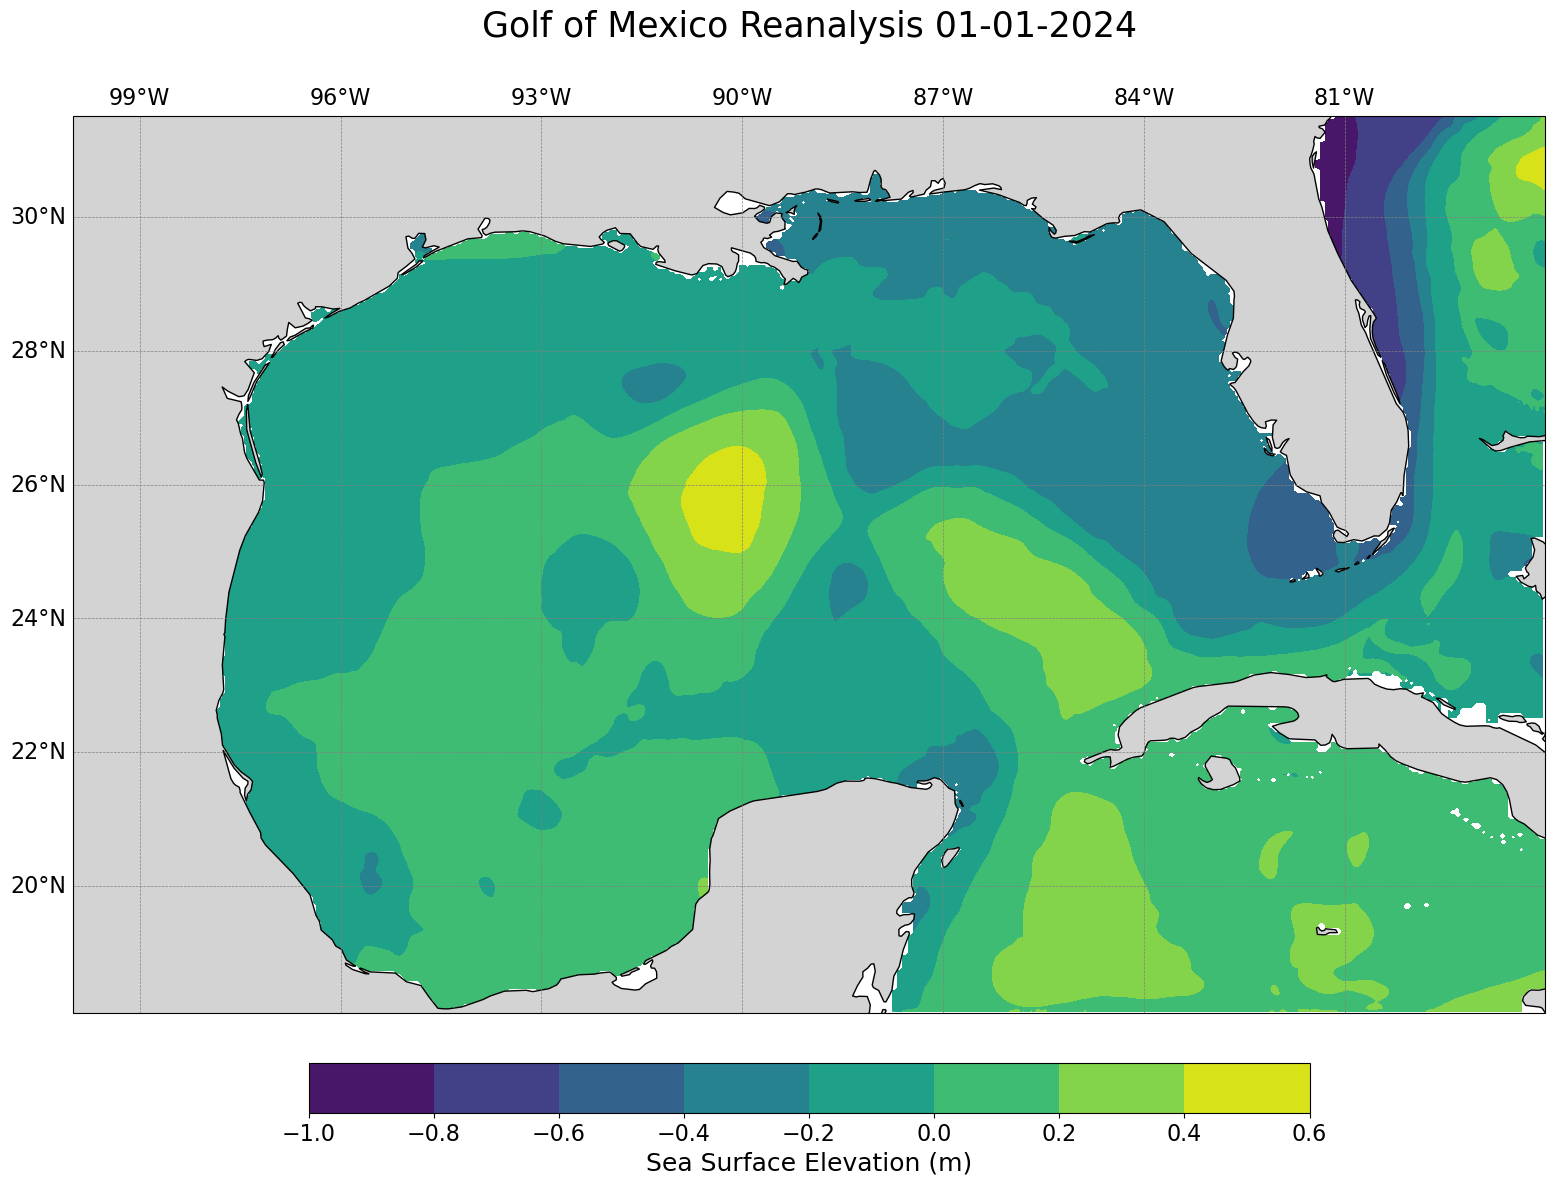

In [11]:
#Creates the type of projection and the area of the projection
fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()))  
ax.set_extent([260,282, 18.11, 31.5])
    
#set variables from the data that will be plotted onto the map
var = data.ssh[0,:,:] 
x, y =data.Longitude, data.Latitude

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())#,N=7)
  
#Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Elevation (m)" , size = 18)

    #Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='lightgrey')
ax.add_feature(land_50m)

#Sets the graph title and format the size and location of the title
ax.set_title('Gulf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)
    
    ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
        #and sets the grid lines on the graph
    ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

In [ ]:
# Before downloading the dataset, I am setting up the data

In [46]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 12 # How many days do we want to cycle through
date = datetime(2024,1,1) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/tamai/OneDrive - Louisiana State University/Fall 2024/OCS 4001/Lab 7.1/SSH/'
file_name = 'Gulf_of_Mexico_Reanalysis_'

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_001_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


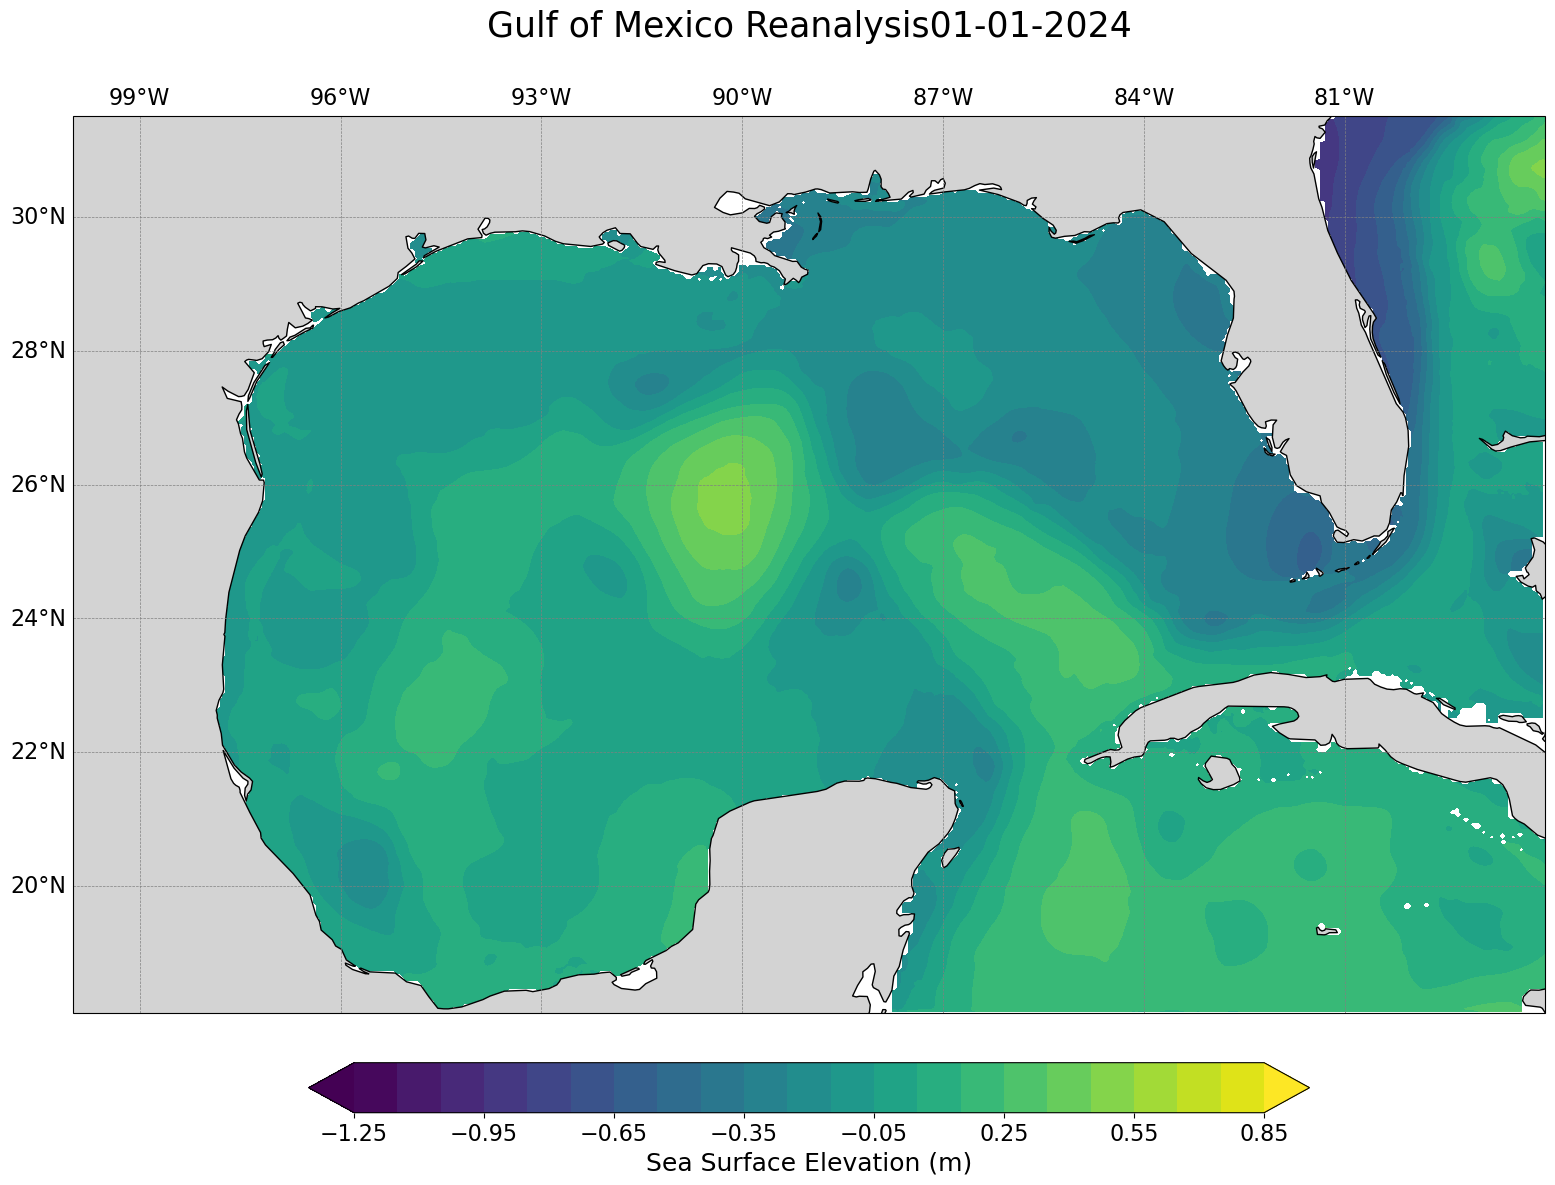

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_002_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


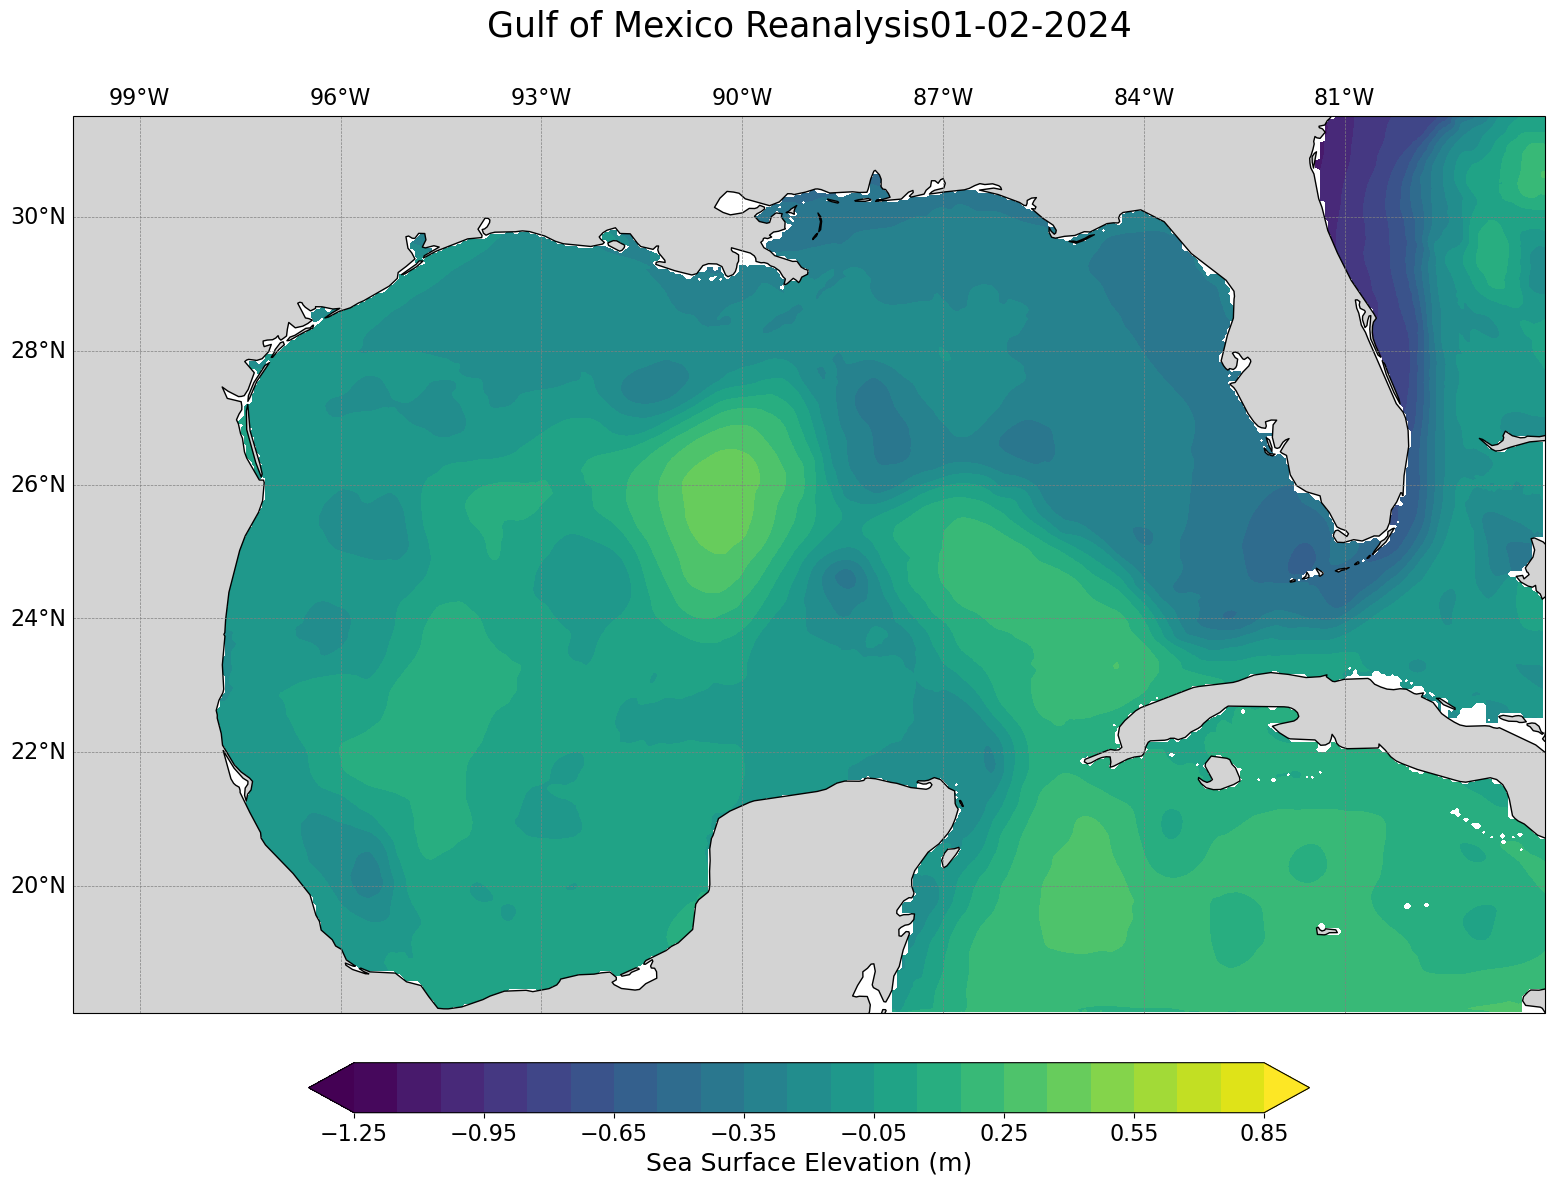

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_003_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


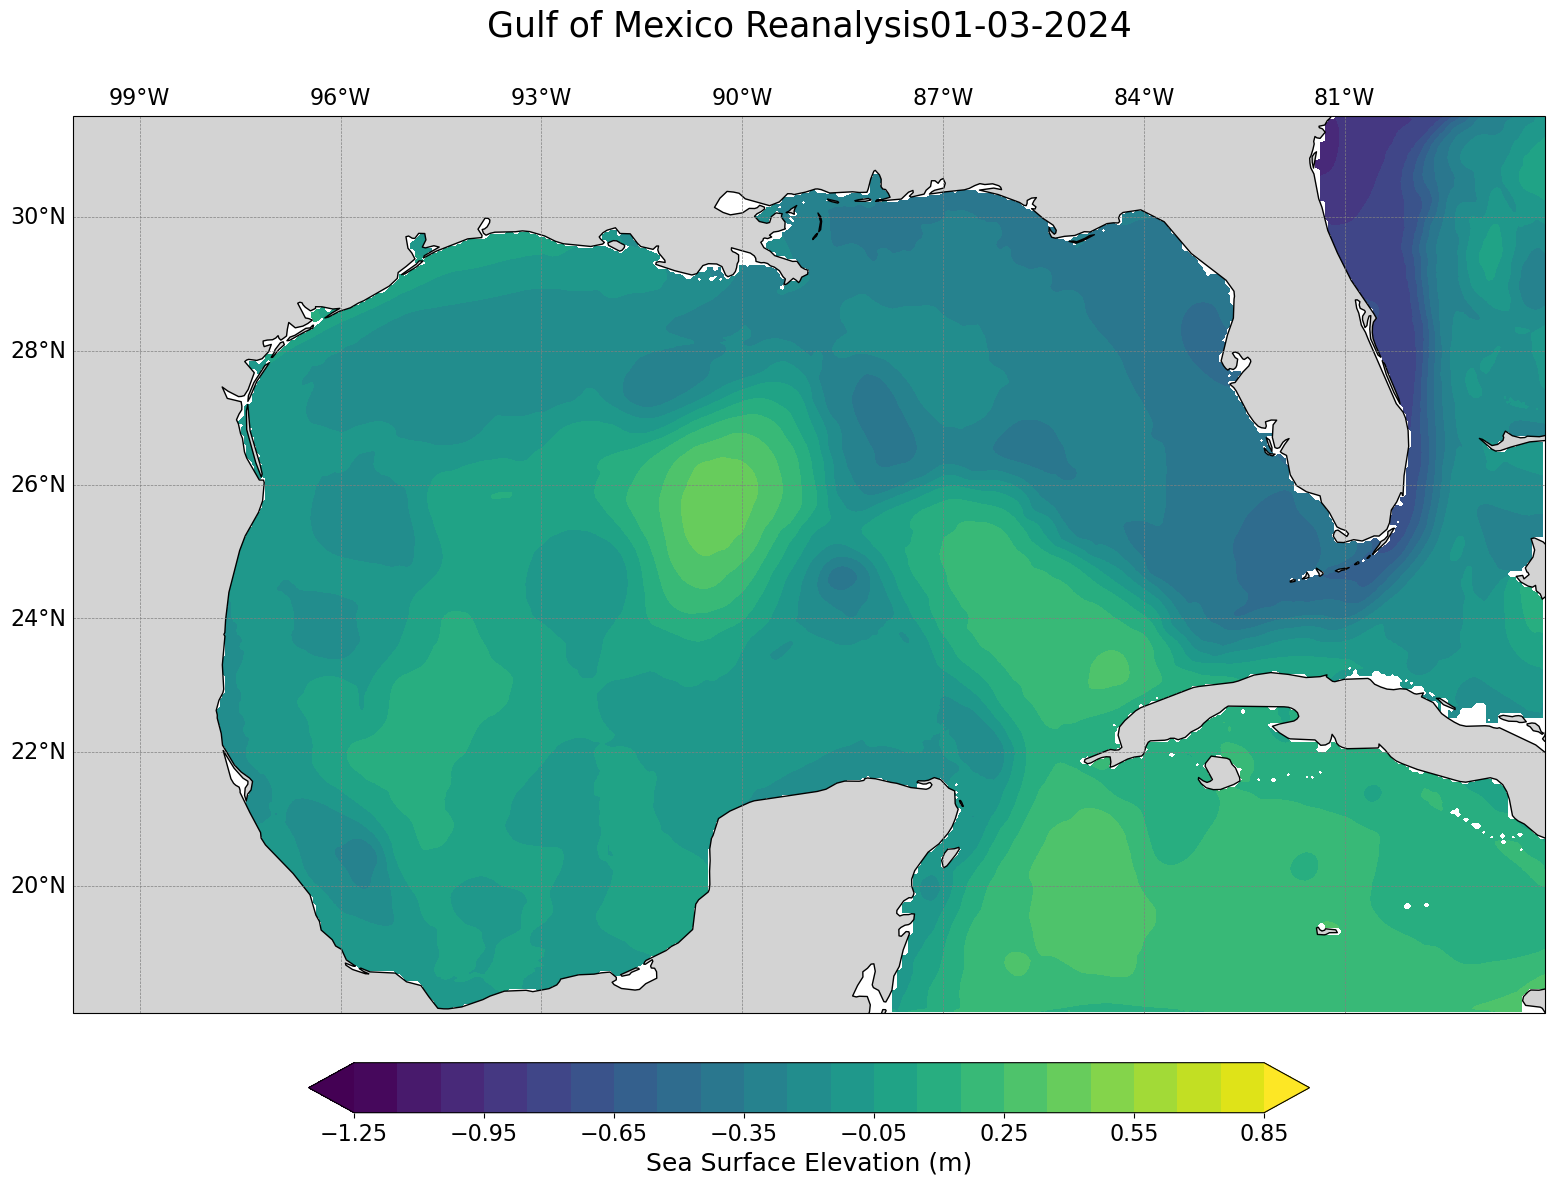

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_004_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


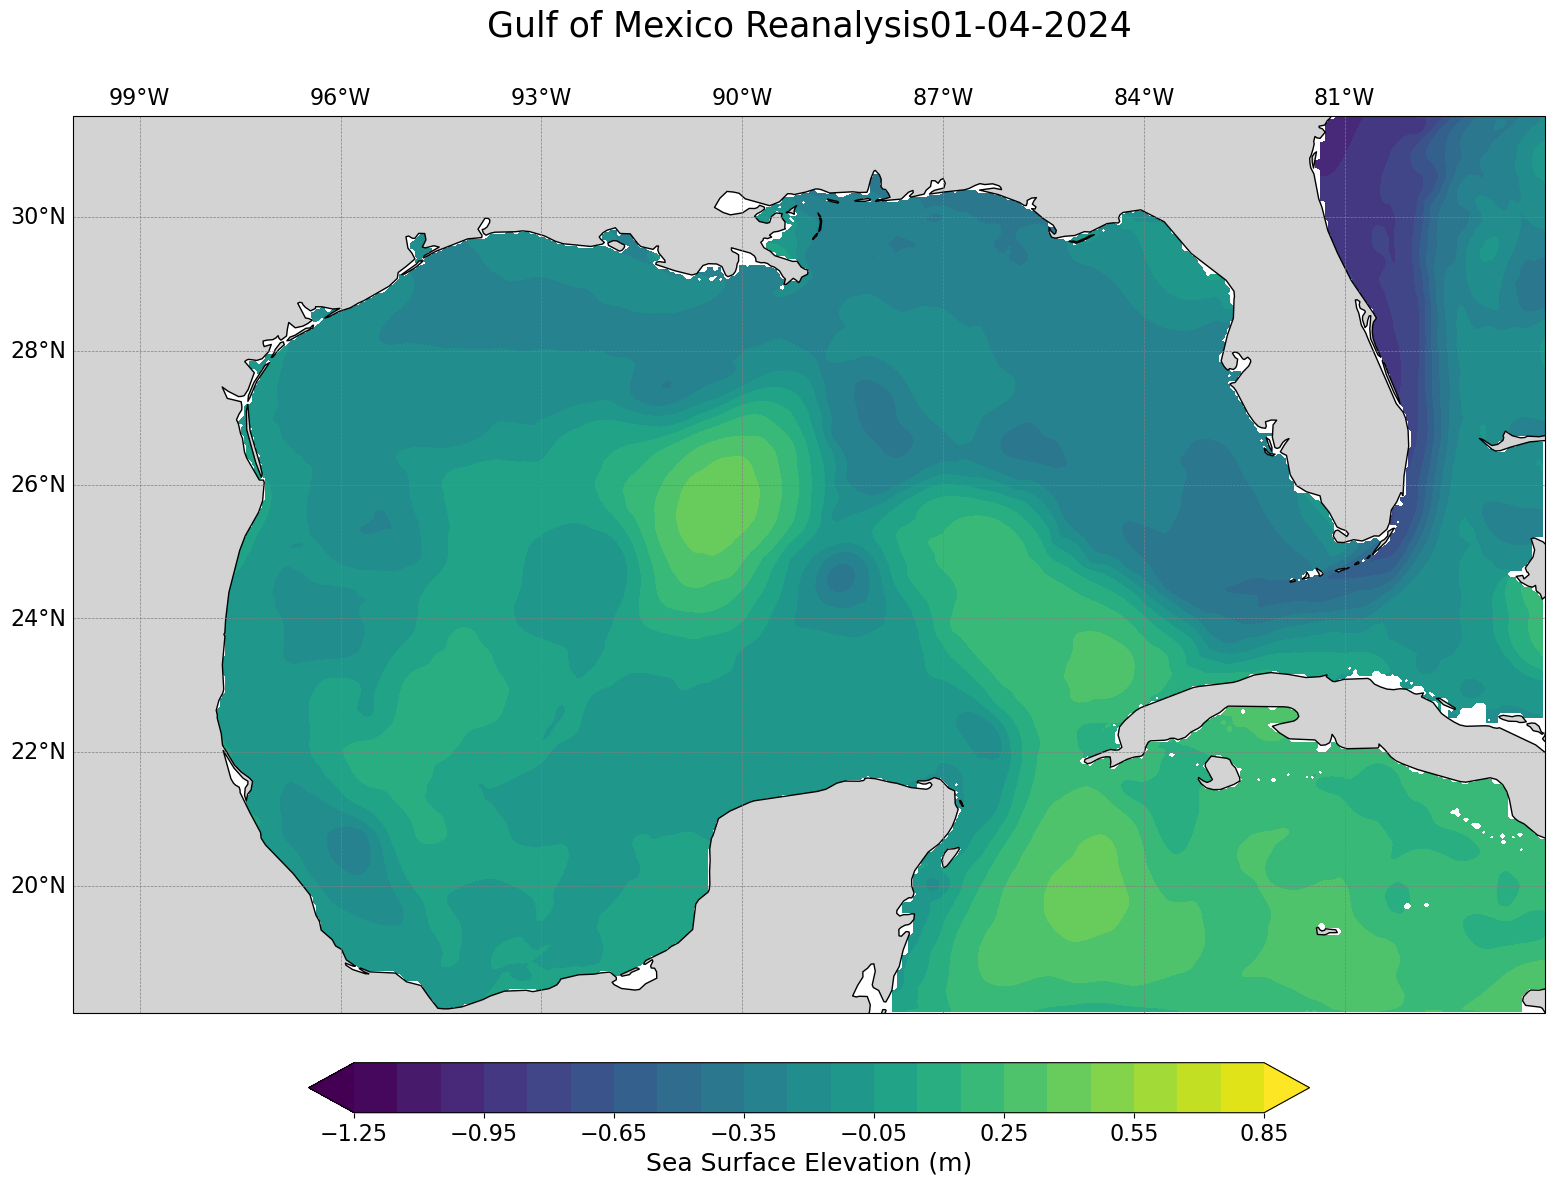

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_005_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


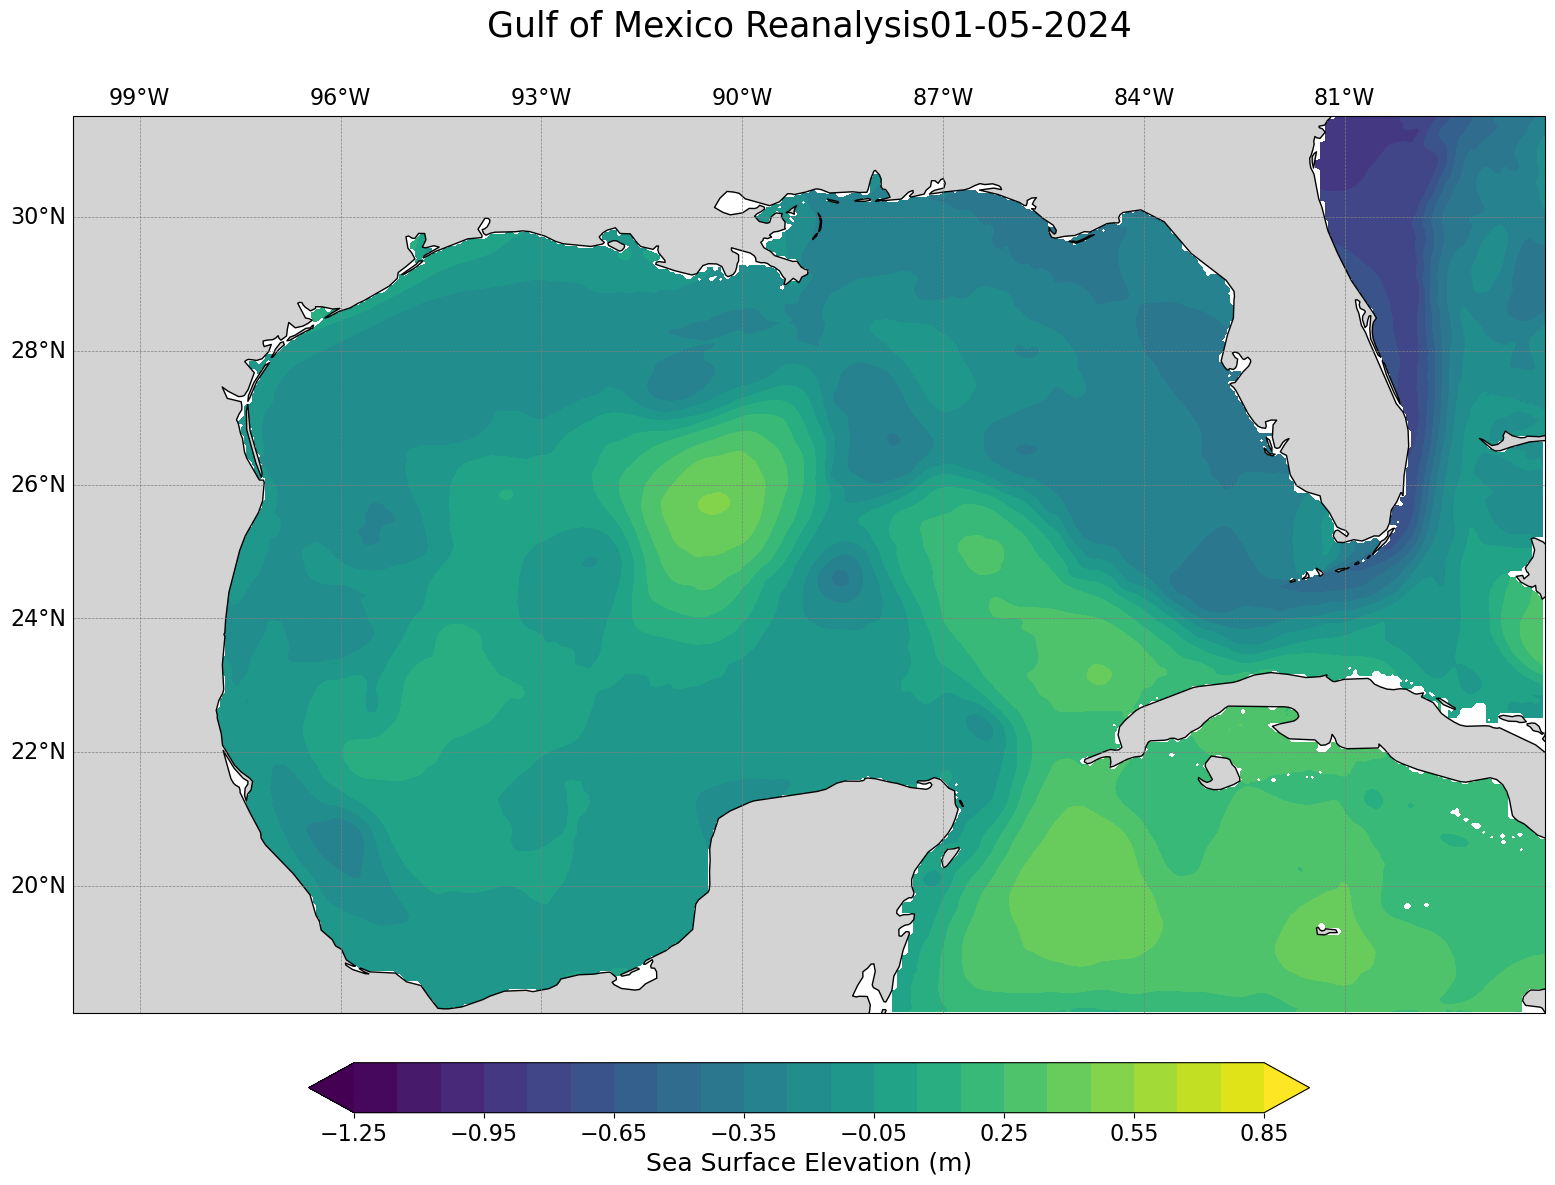

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_006_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


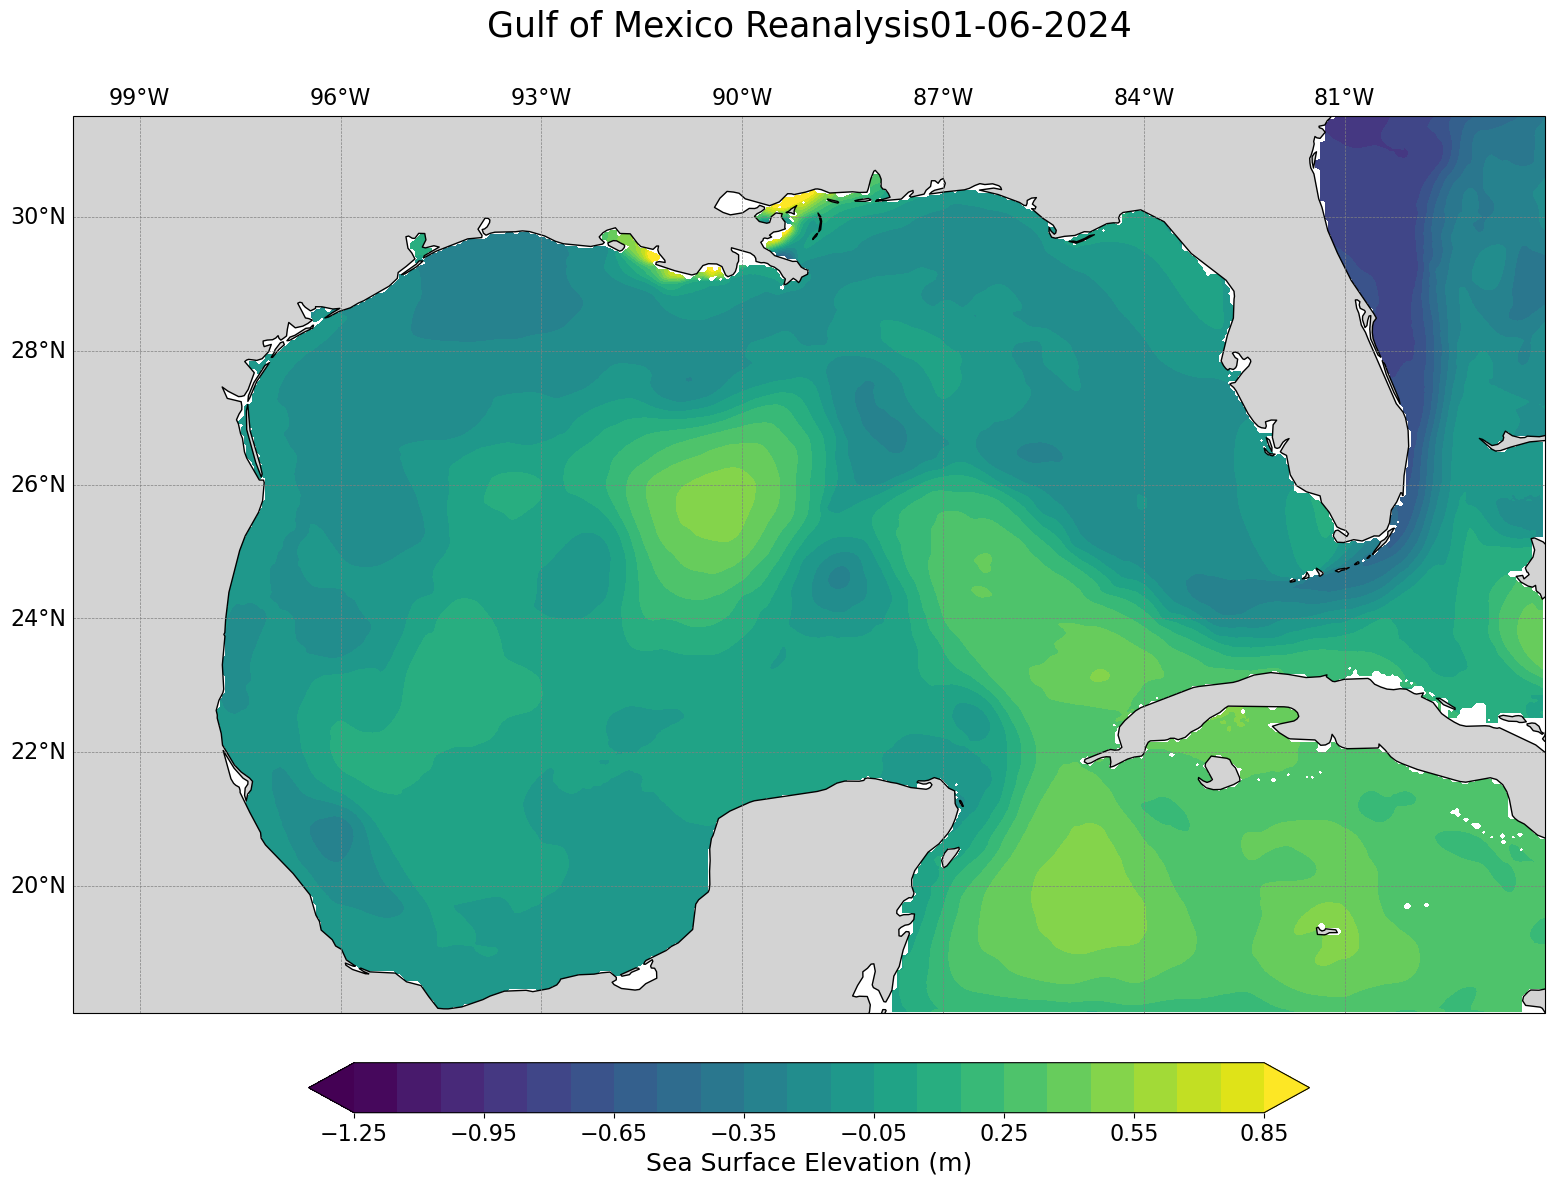

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_007_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


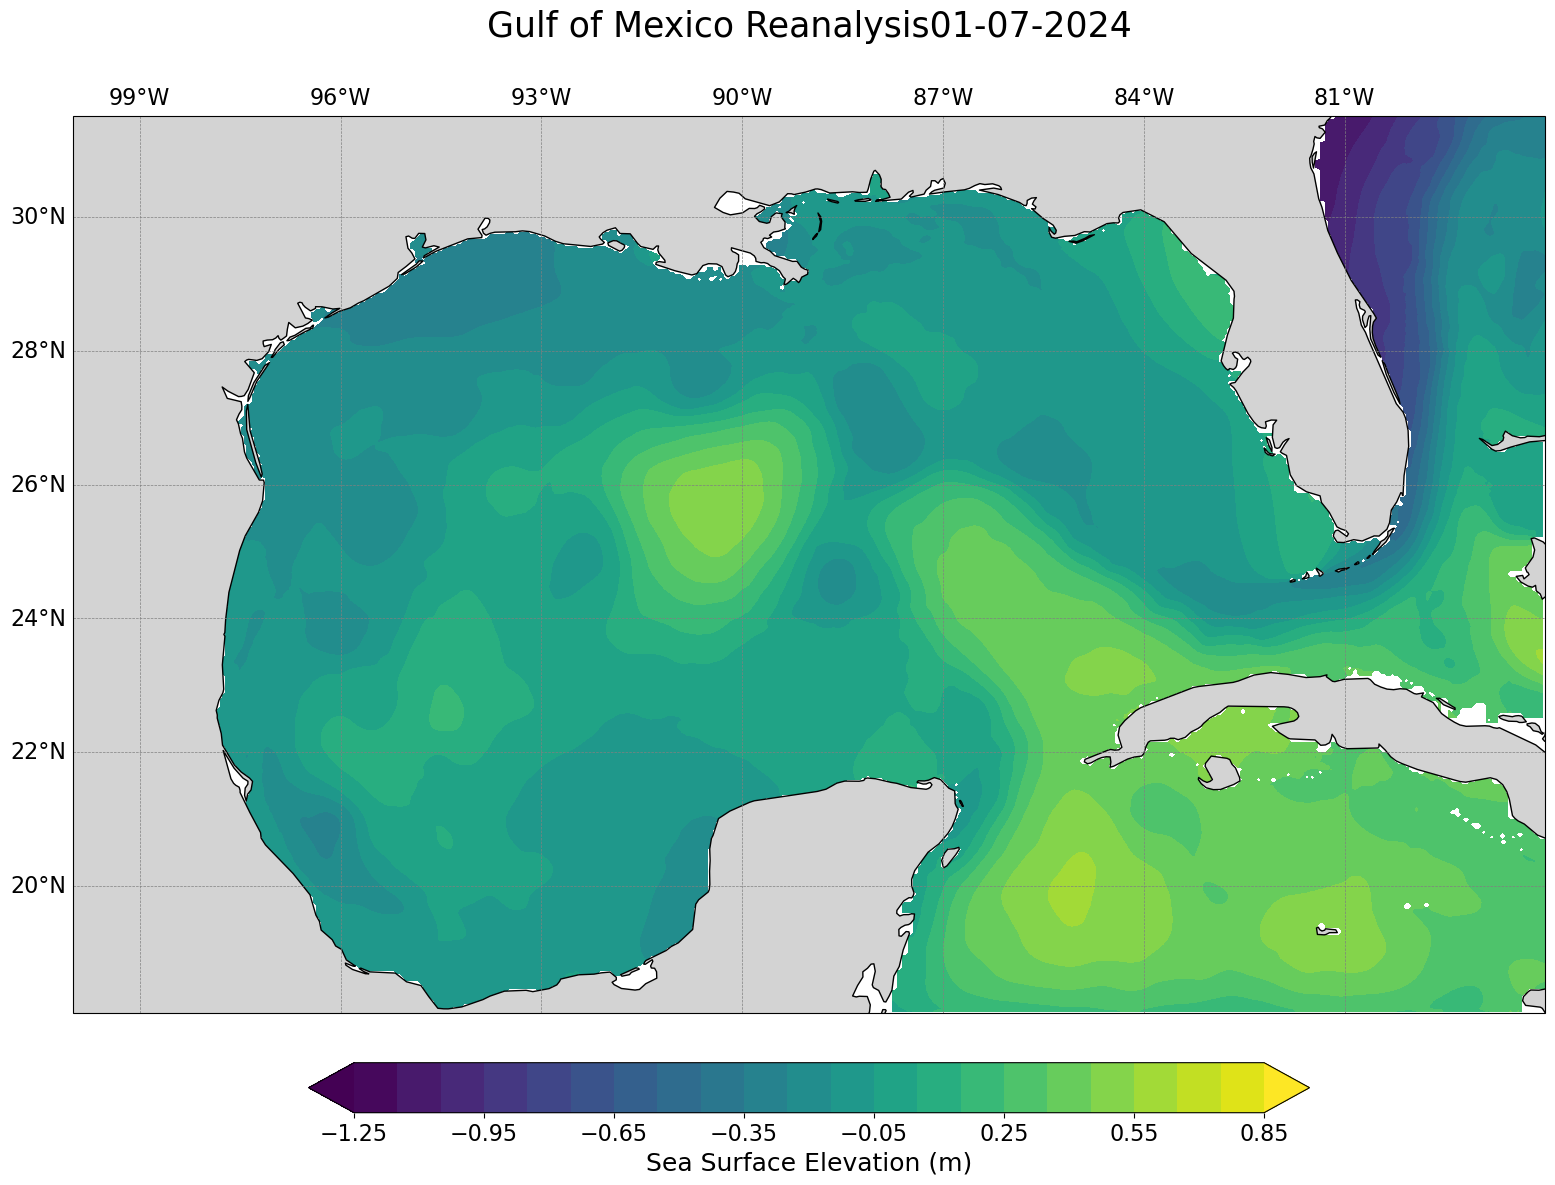

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_008_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


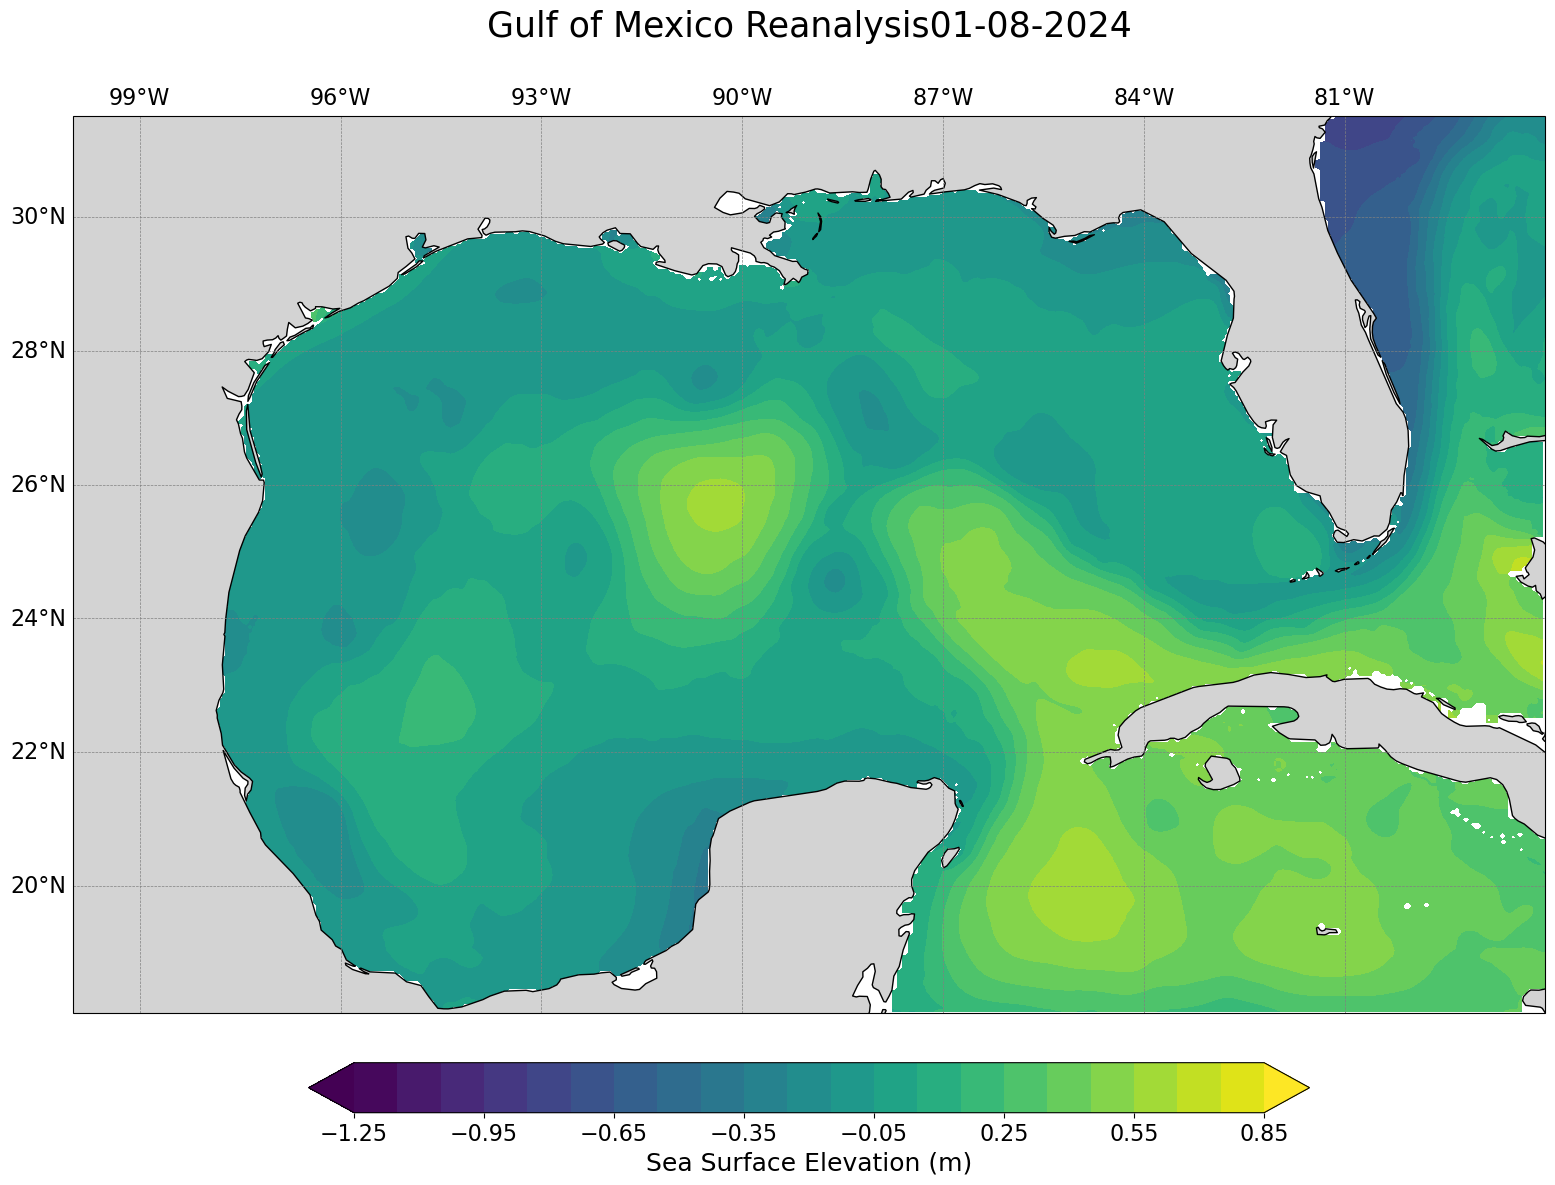

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_009_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


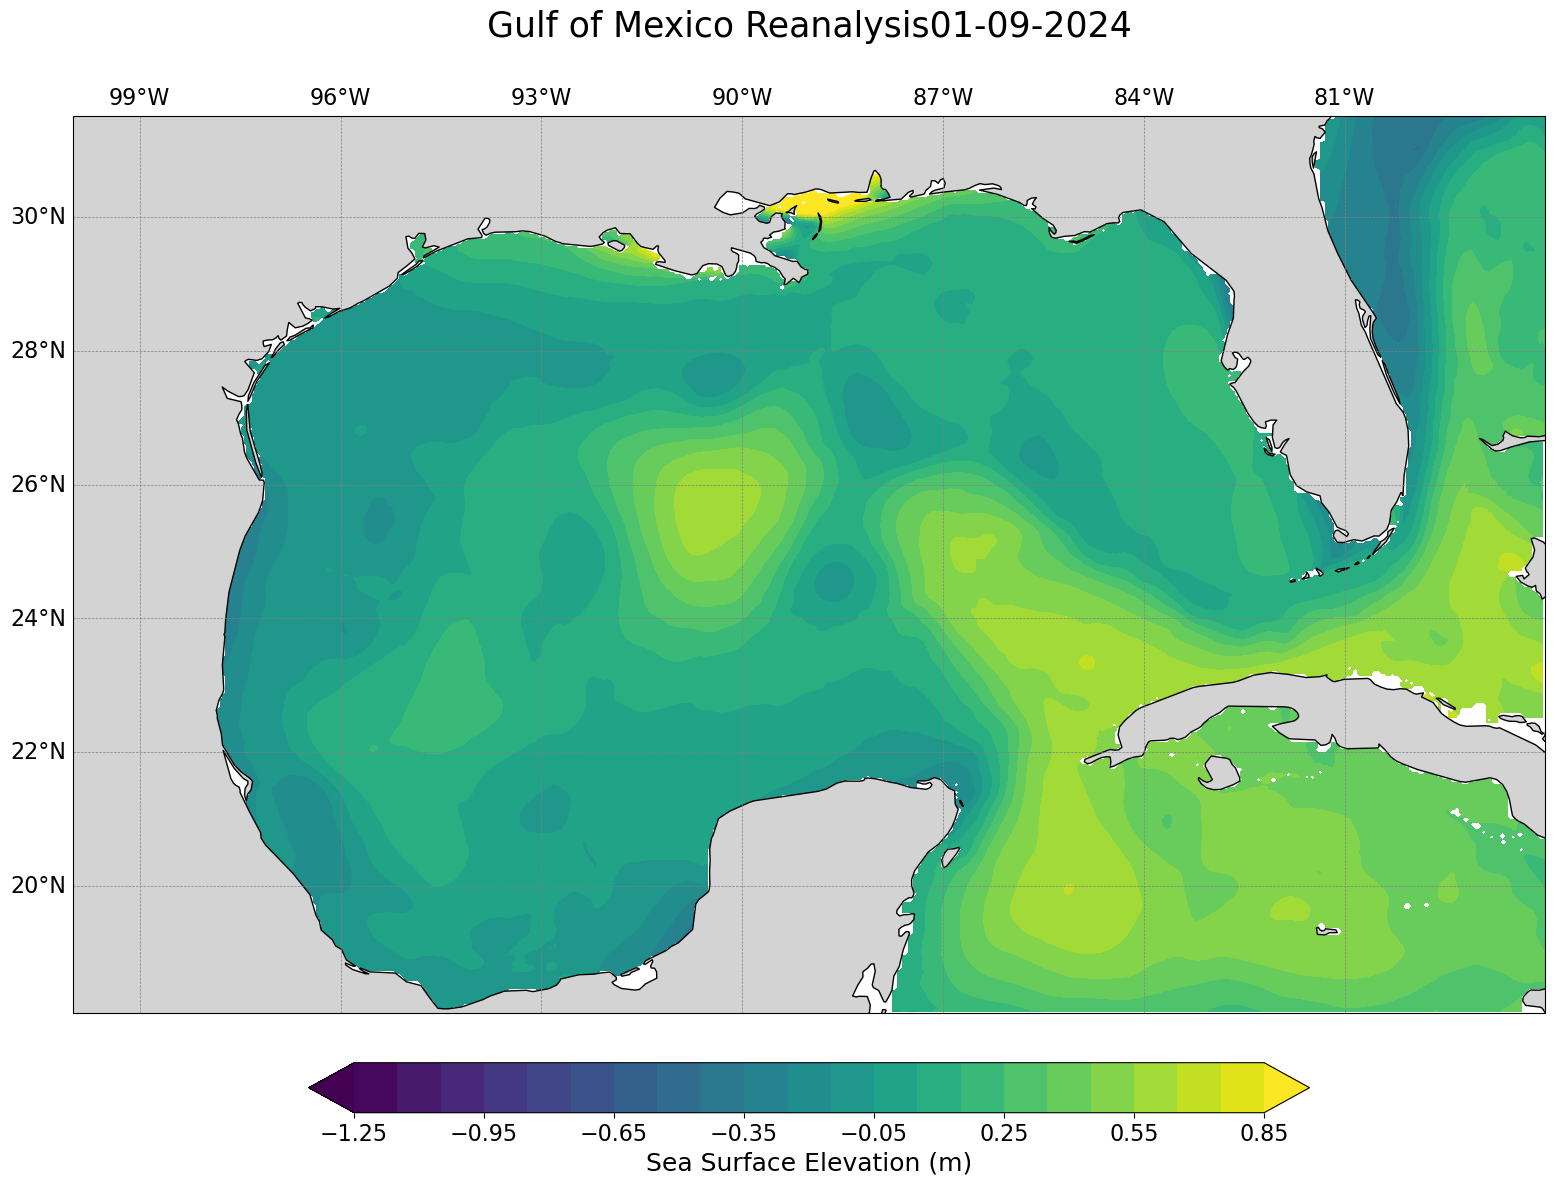

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_010_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


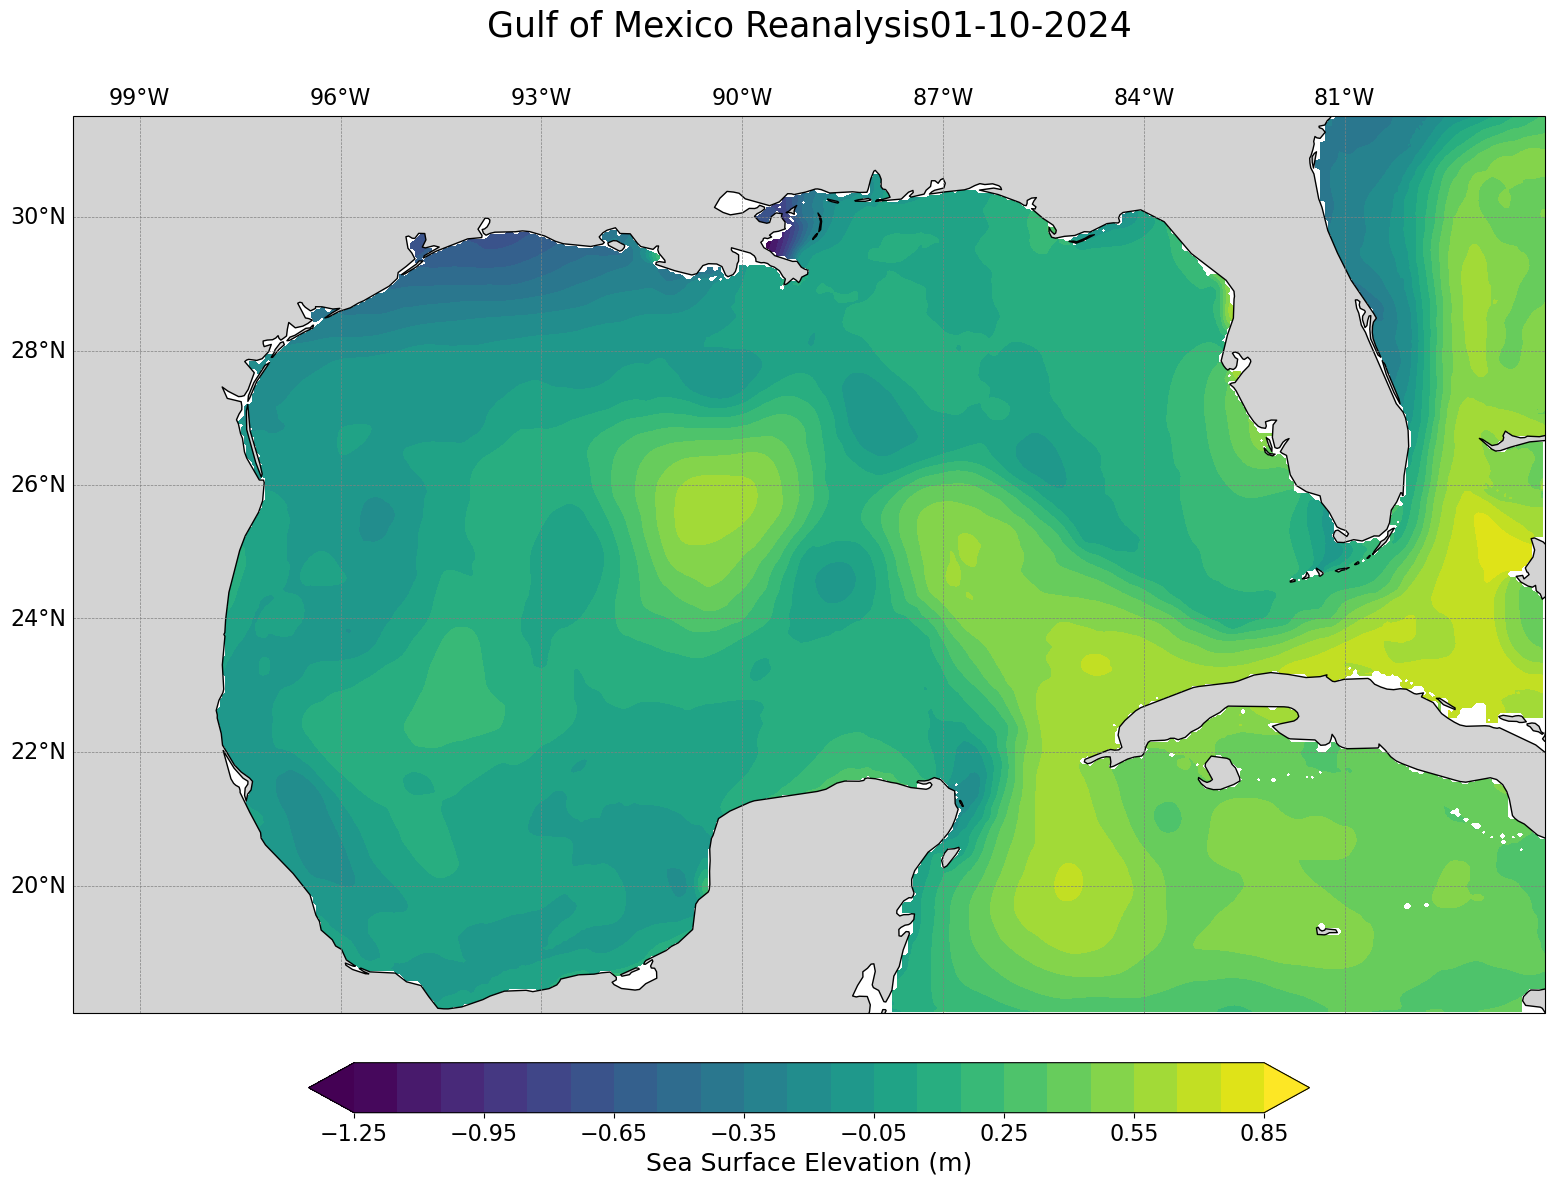

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_011_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


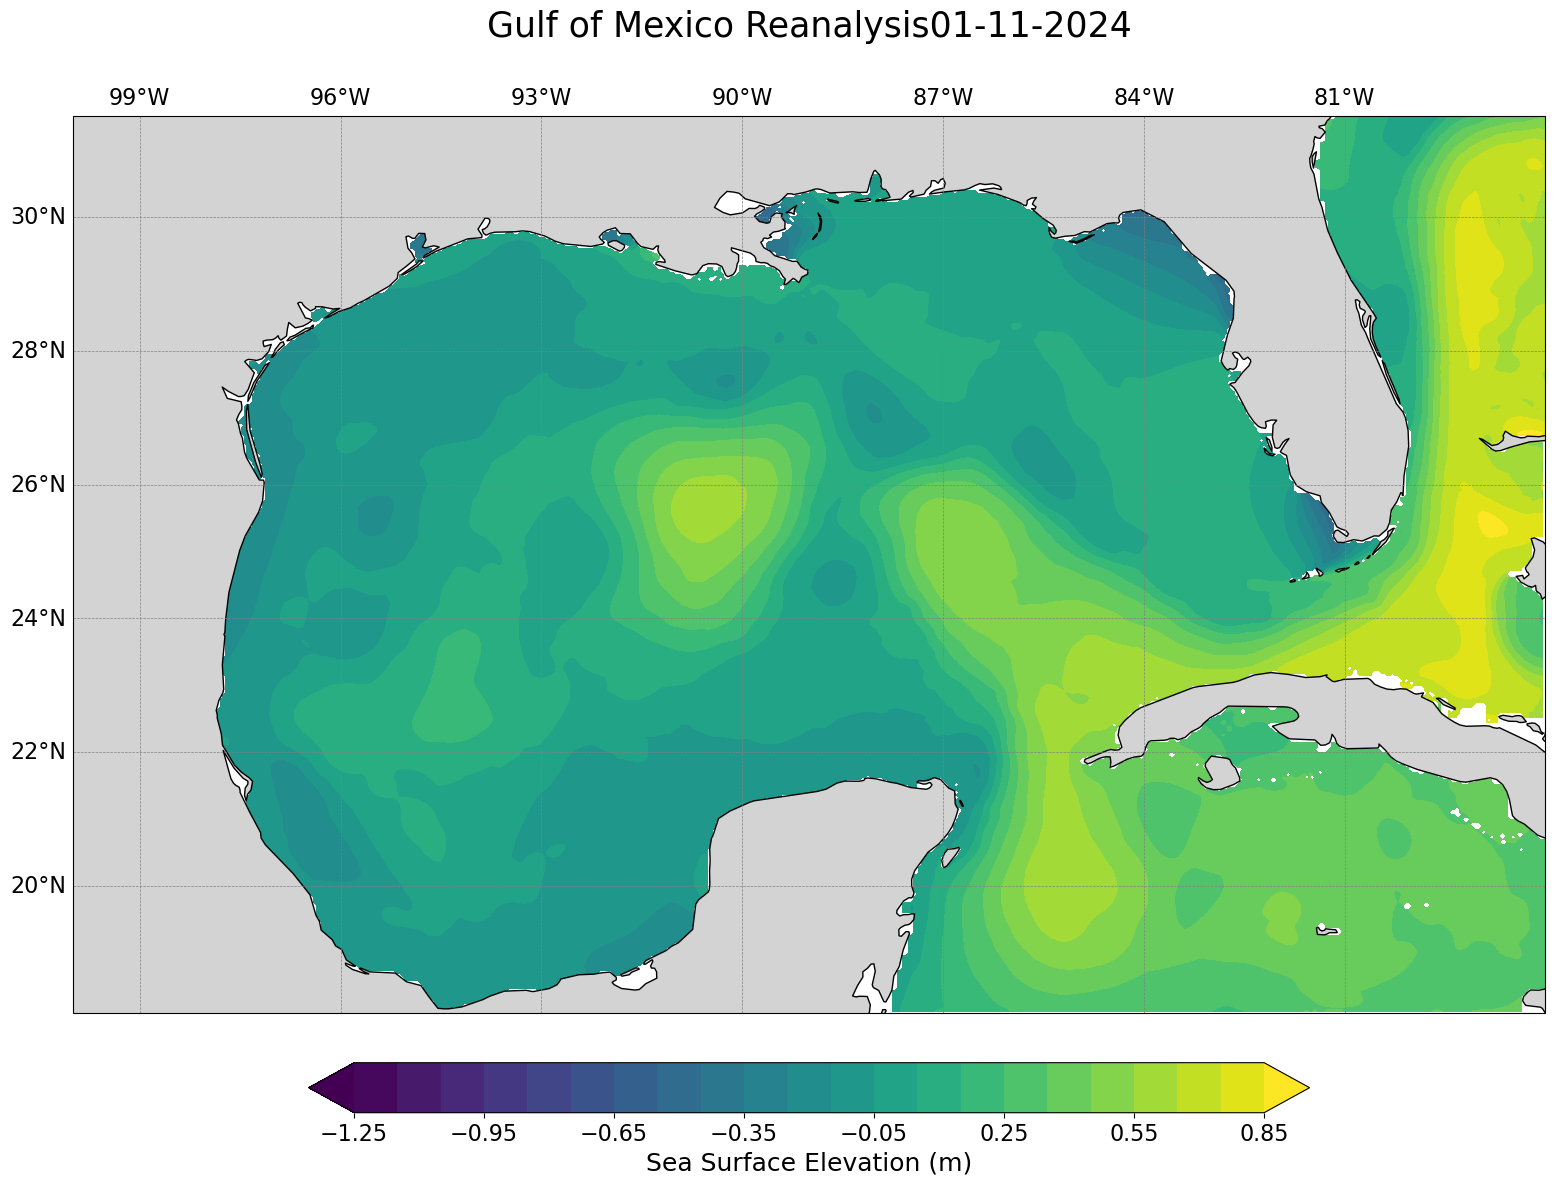

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_012_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


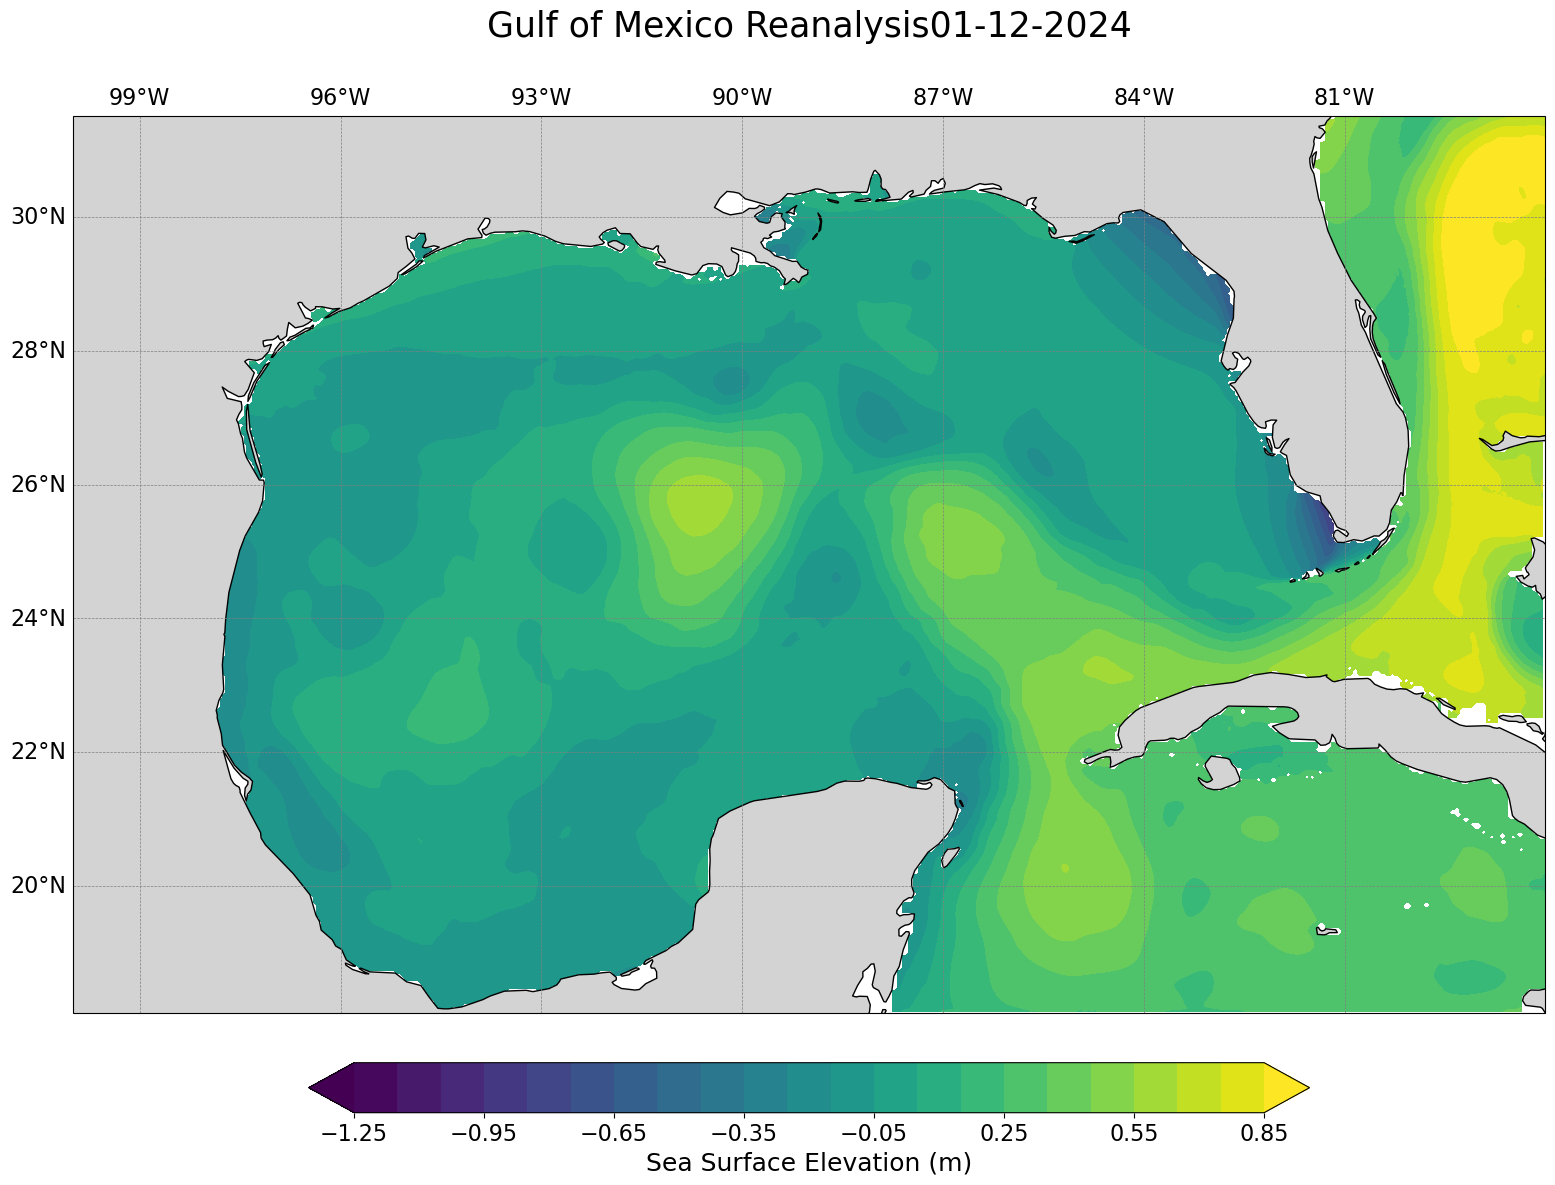

In [47]:
# We start off by looping through the amount of days we want to plot
for date_index in range(1,number_of_days+1):
    #Open open the data for the day that we are looking at 
    link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_"+str(date_index).zfill(3)+"_01_2d.nc"
    data = xr.open_dataset(link, decode_times=False)
    print(link)

    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([260,282, 18.11, 31.5])

    #set variables from the data that will be plotted onto the map
    var = data.ssh[0,:,:] 
    x, y =data.Longitude, data.Latitude

    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels,extend='both')#,N=7)

    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05,extend='bith')
    cbar.set_label( "Sea Surface Elevation (m)", size = 18)

        #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)

    #Sets the graph title and format the size and location of the title
    ax.set_title('Gulf of Mexico Reanalysis'+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)

        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
   
    #Save the plot in the given location and name, with the extension of the date
    fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', dpi = 500)
 
    
    #Increment the date, as we go through to the next file so it matches up with the correct time
    date = date + timedelta(days=1)

In [ ]:
#GIF2

In [33]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 12 # How many days do we want to cycle through
date = datetime(2024,1,1) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 
file_name = 'Gulf_of_Mexico_Reanalysis_'

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_001_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


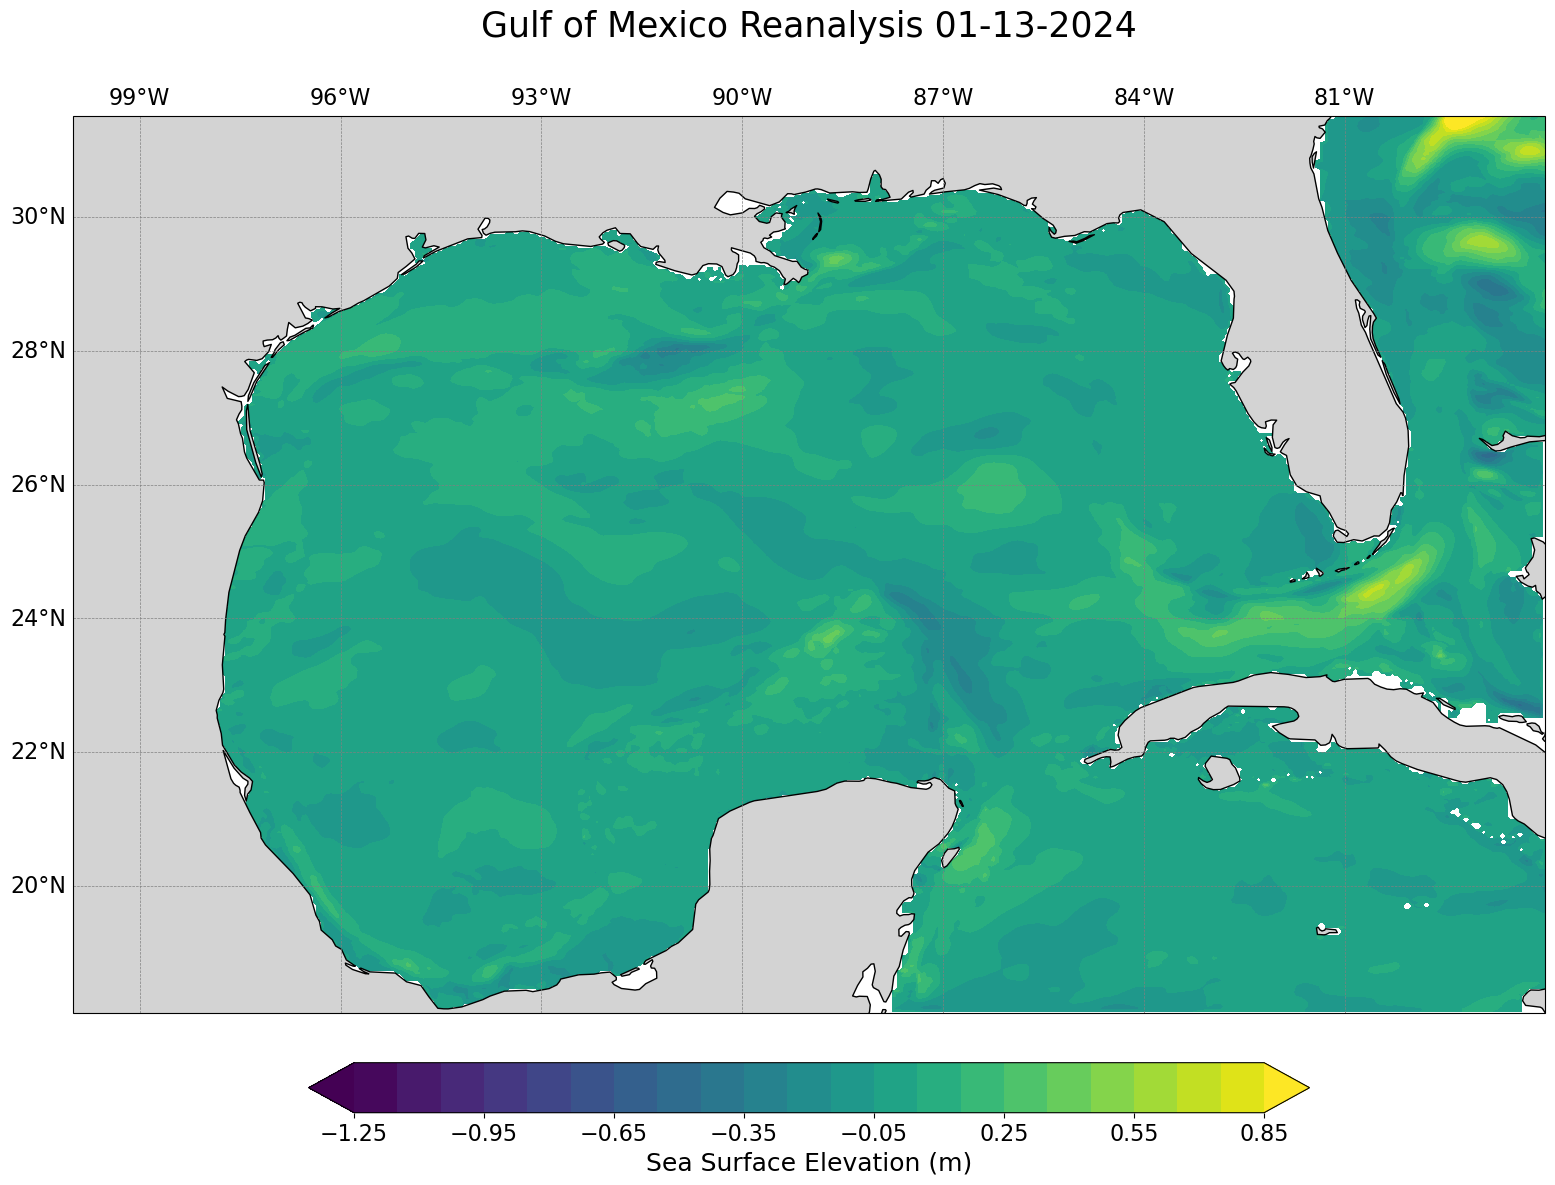

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_002_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


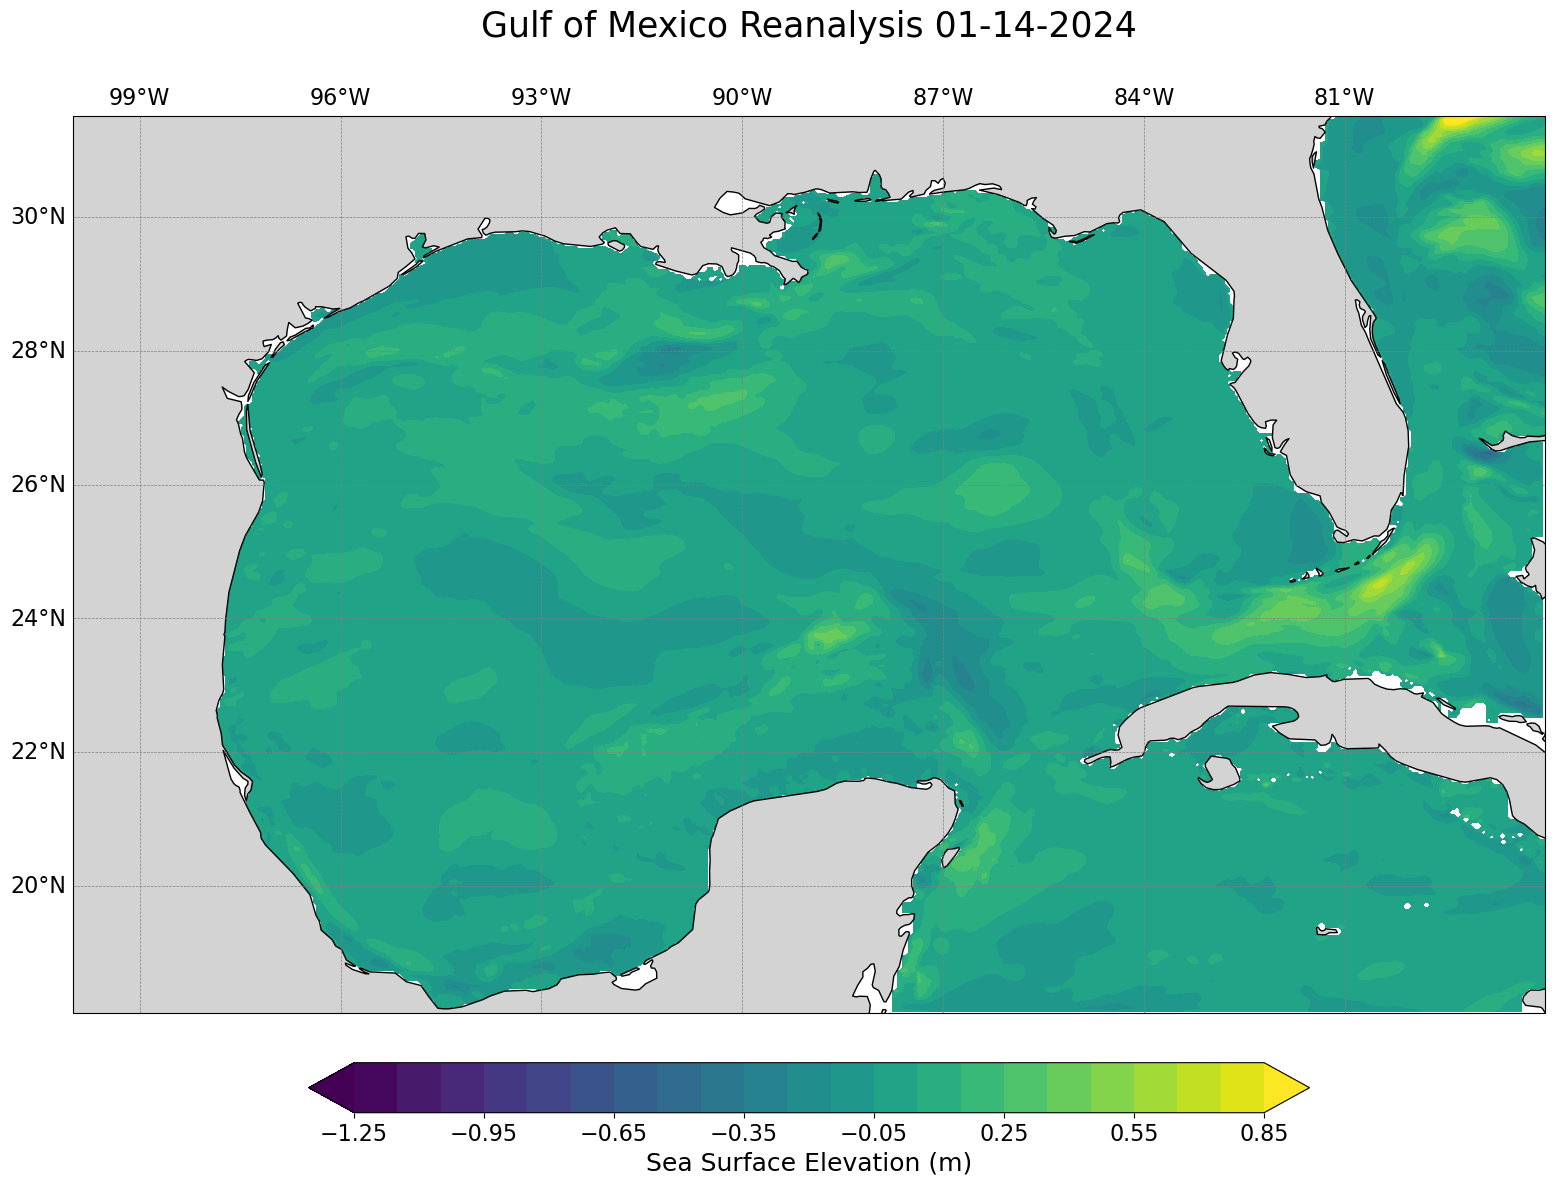

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_003_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


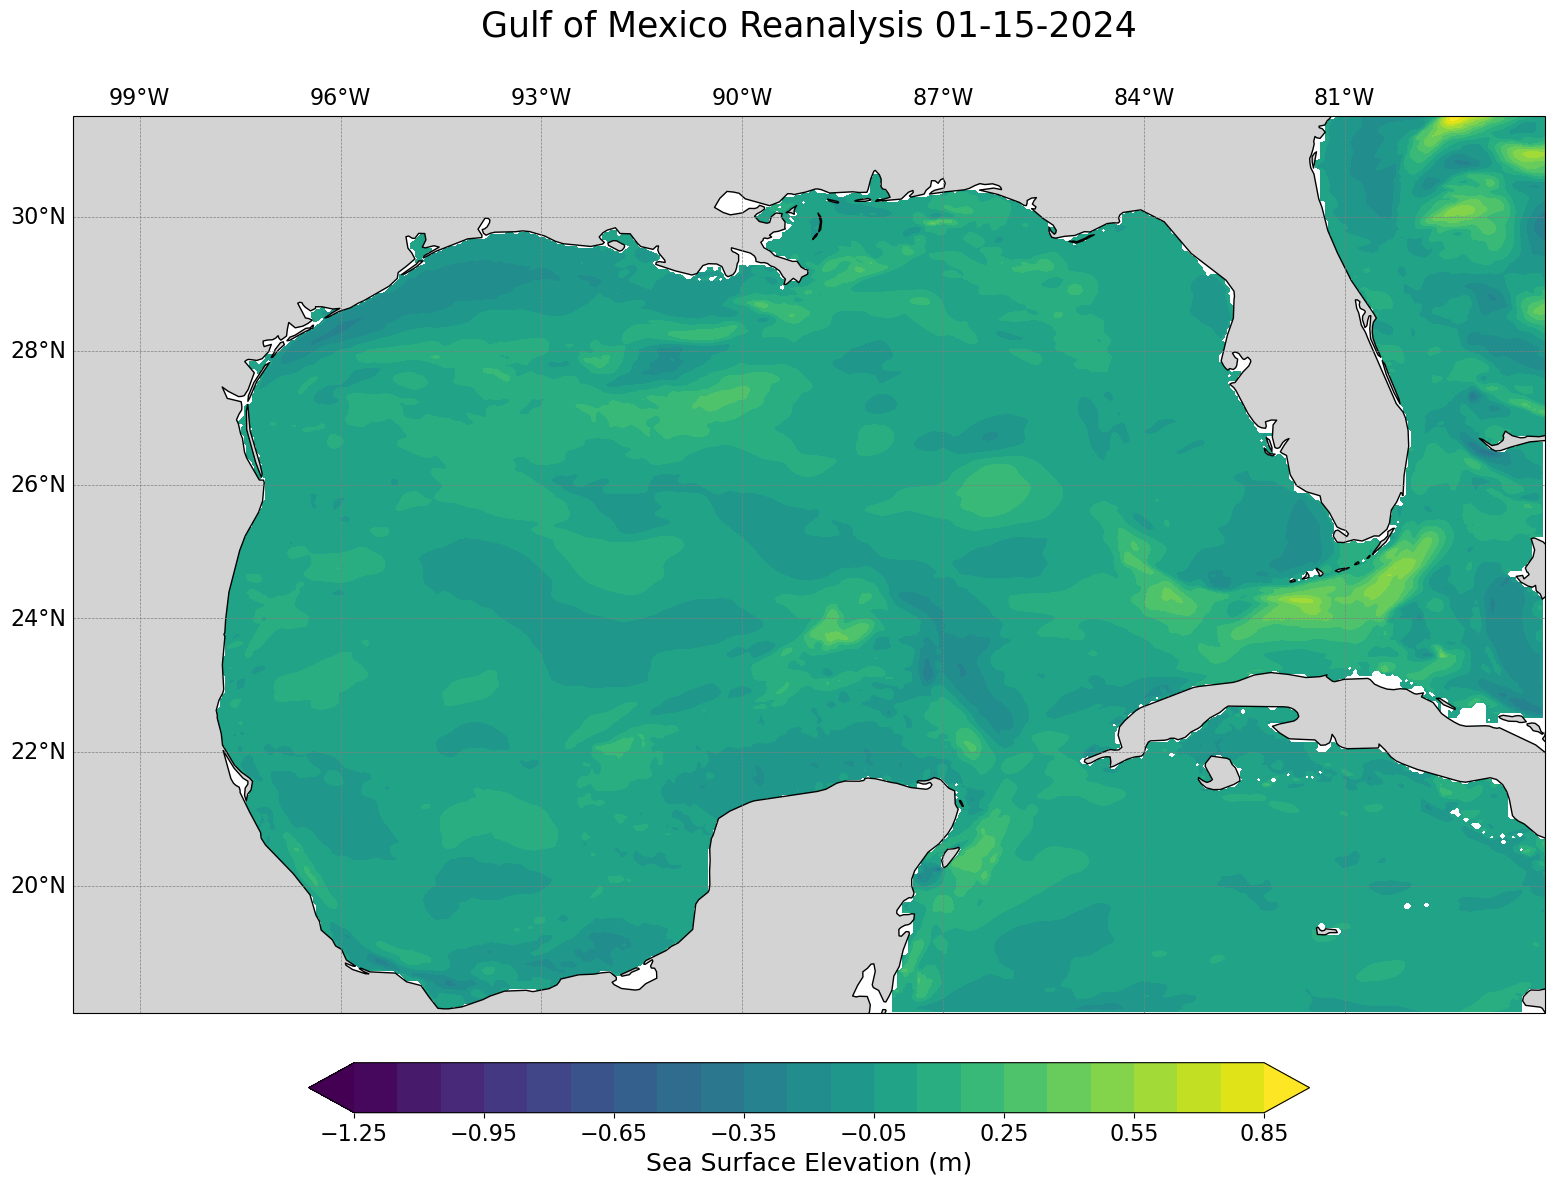

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_004_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


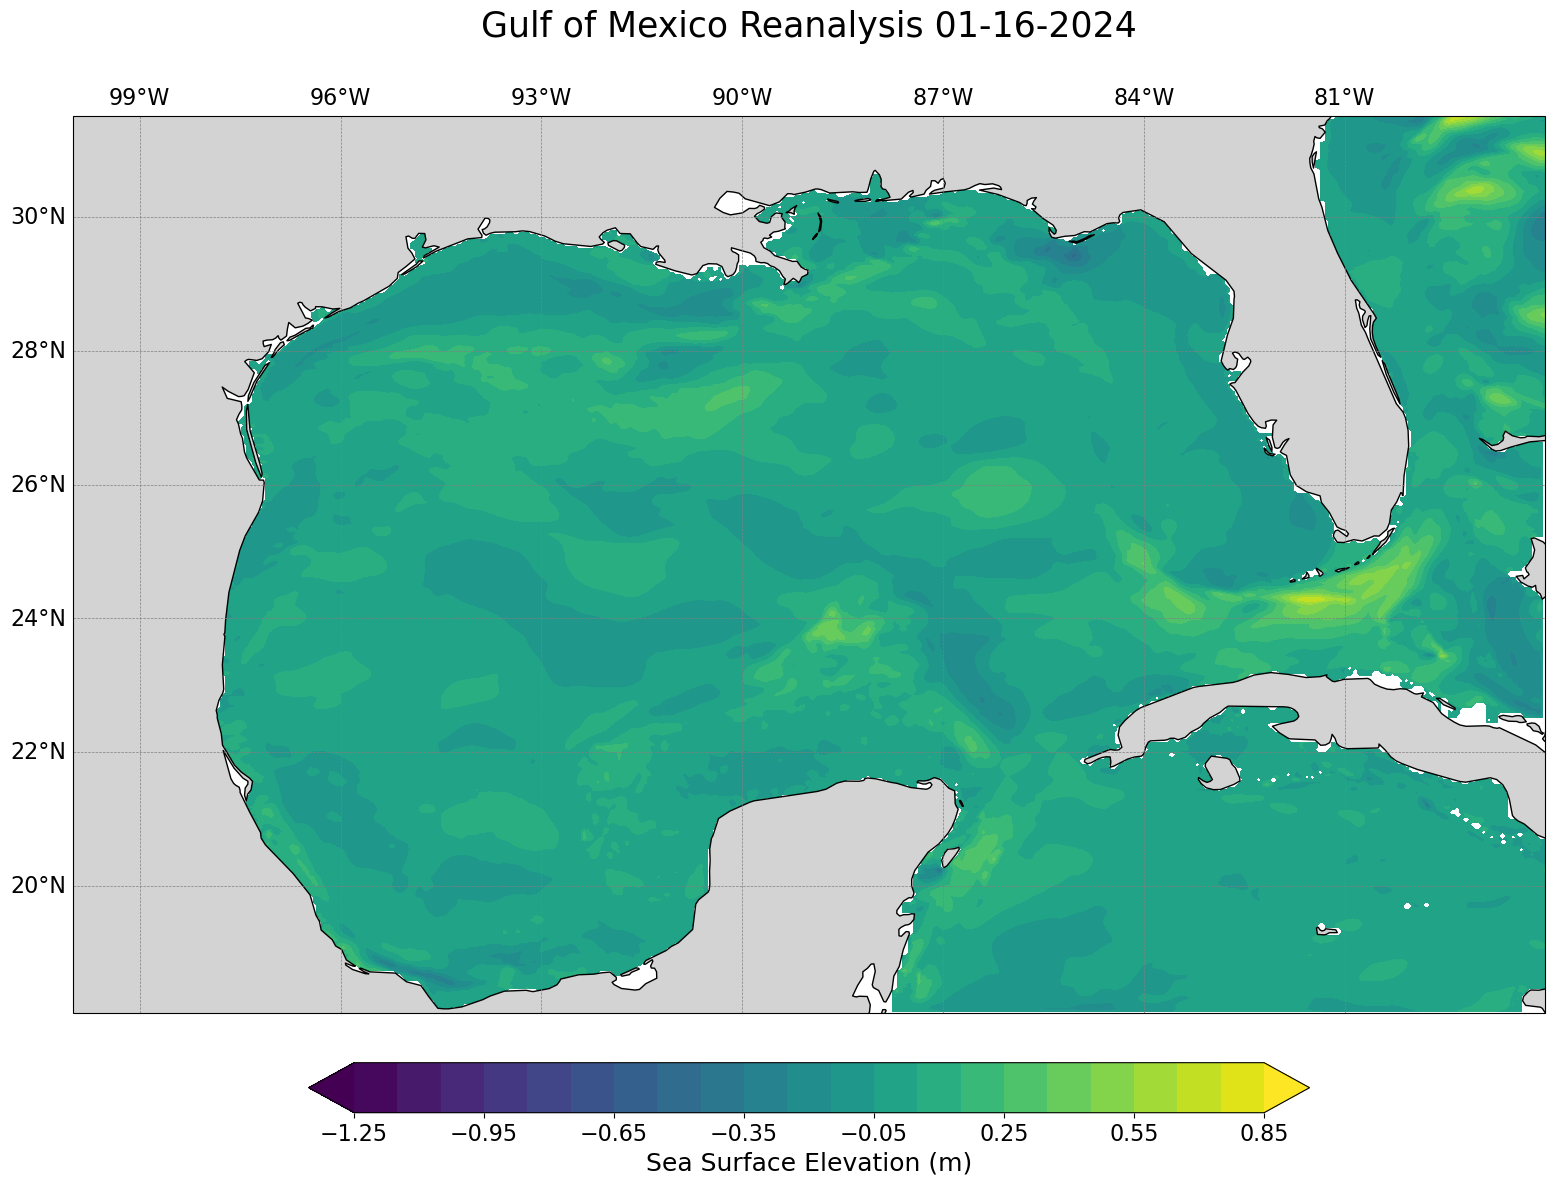

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_005_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


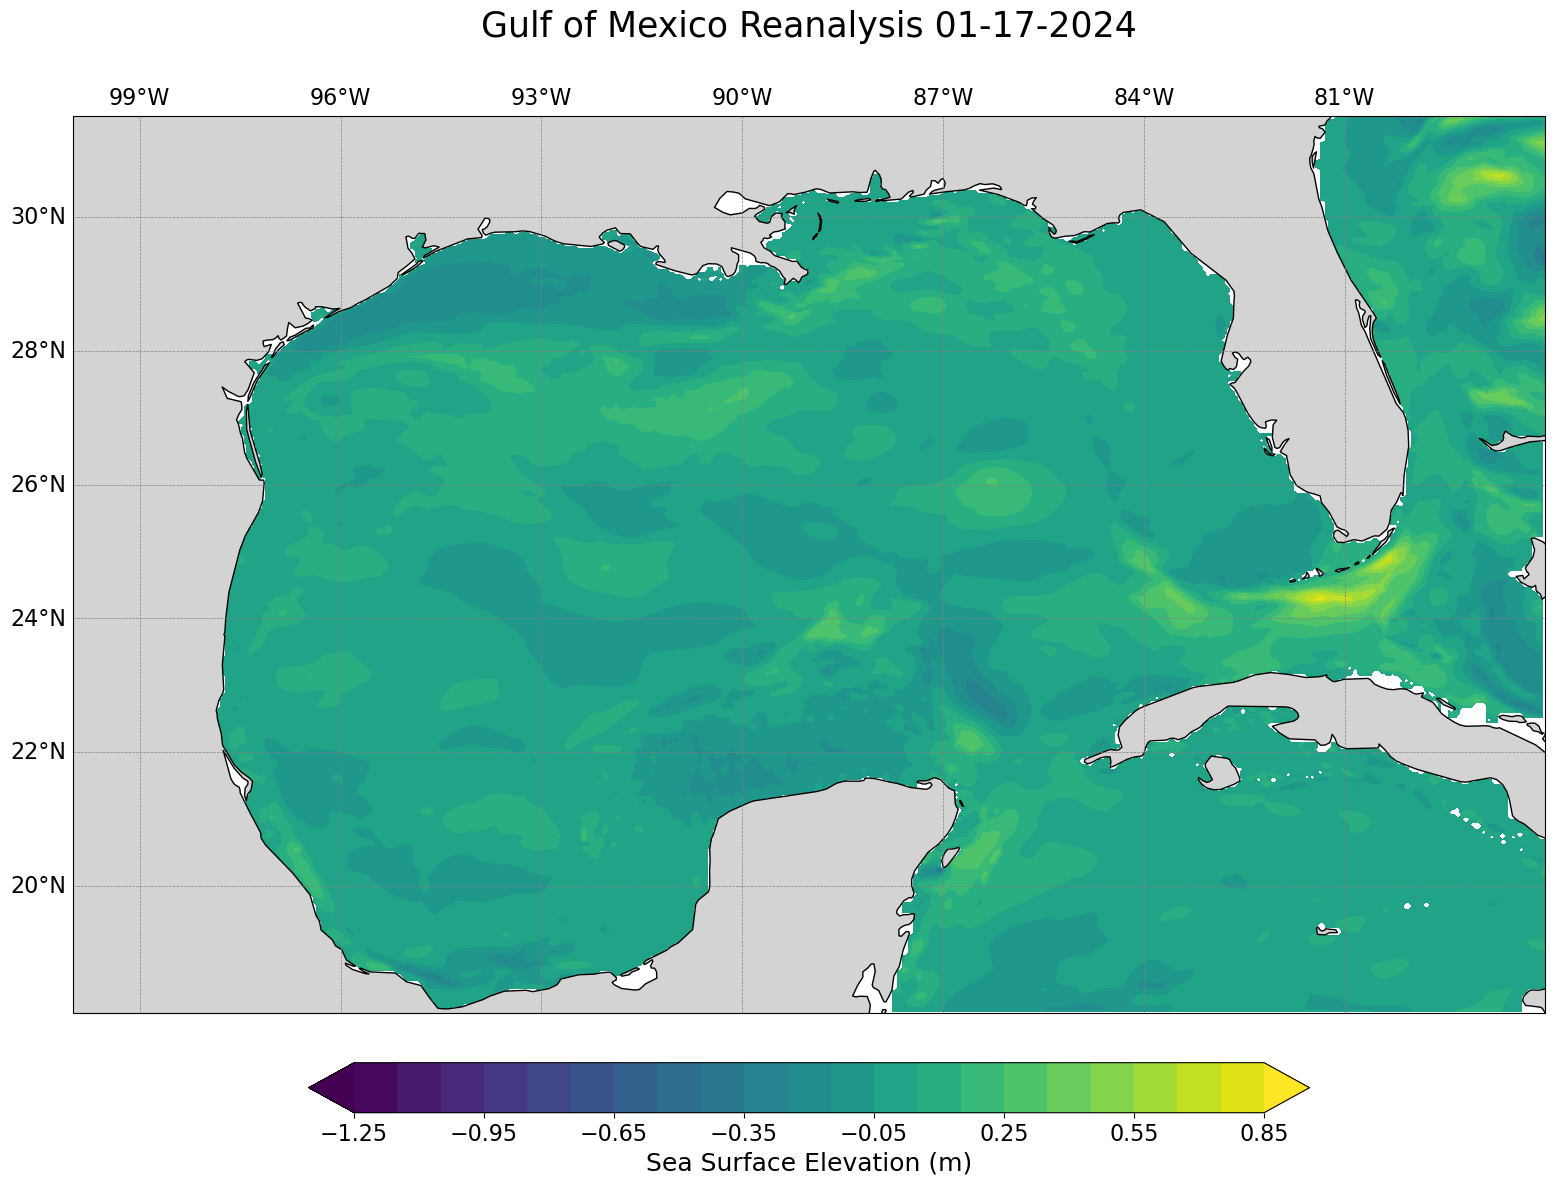

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_006_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


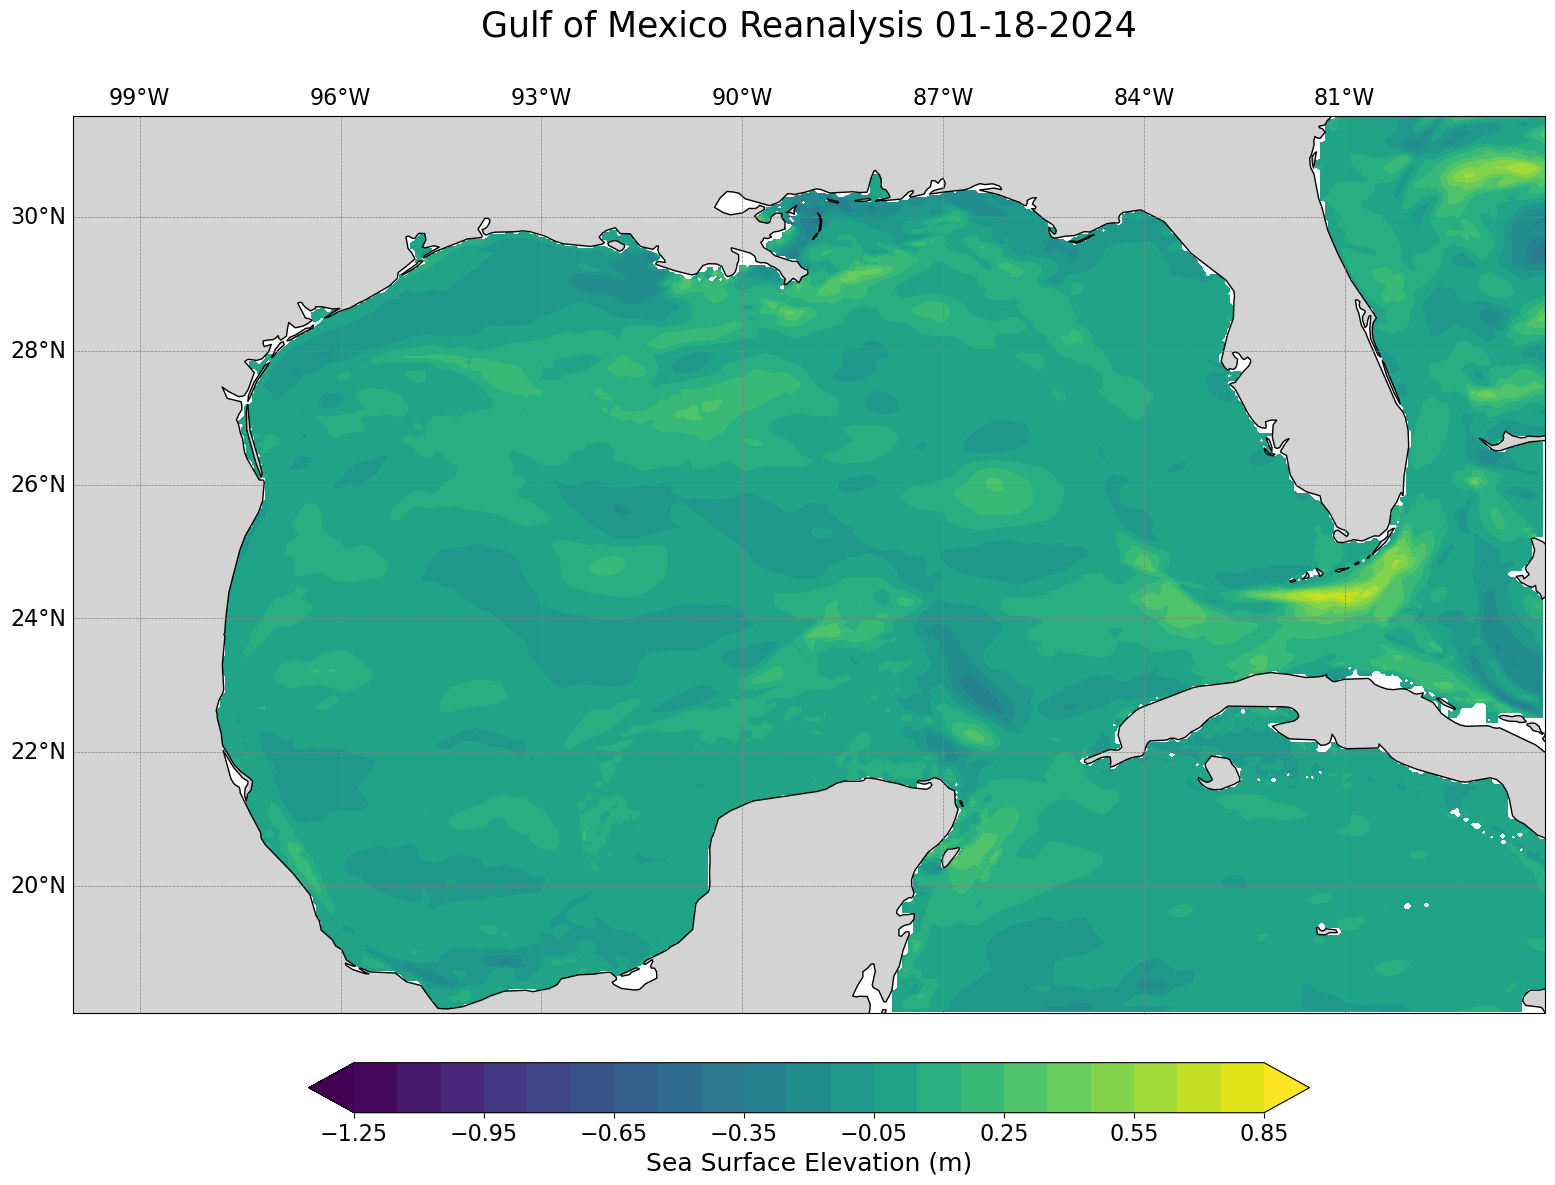

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_007_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


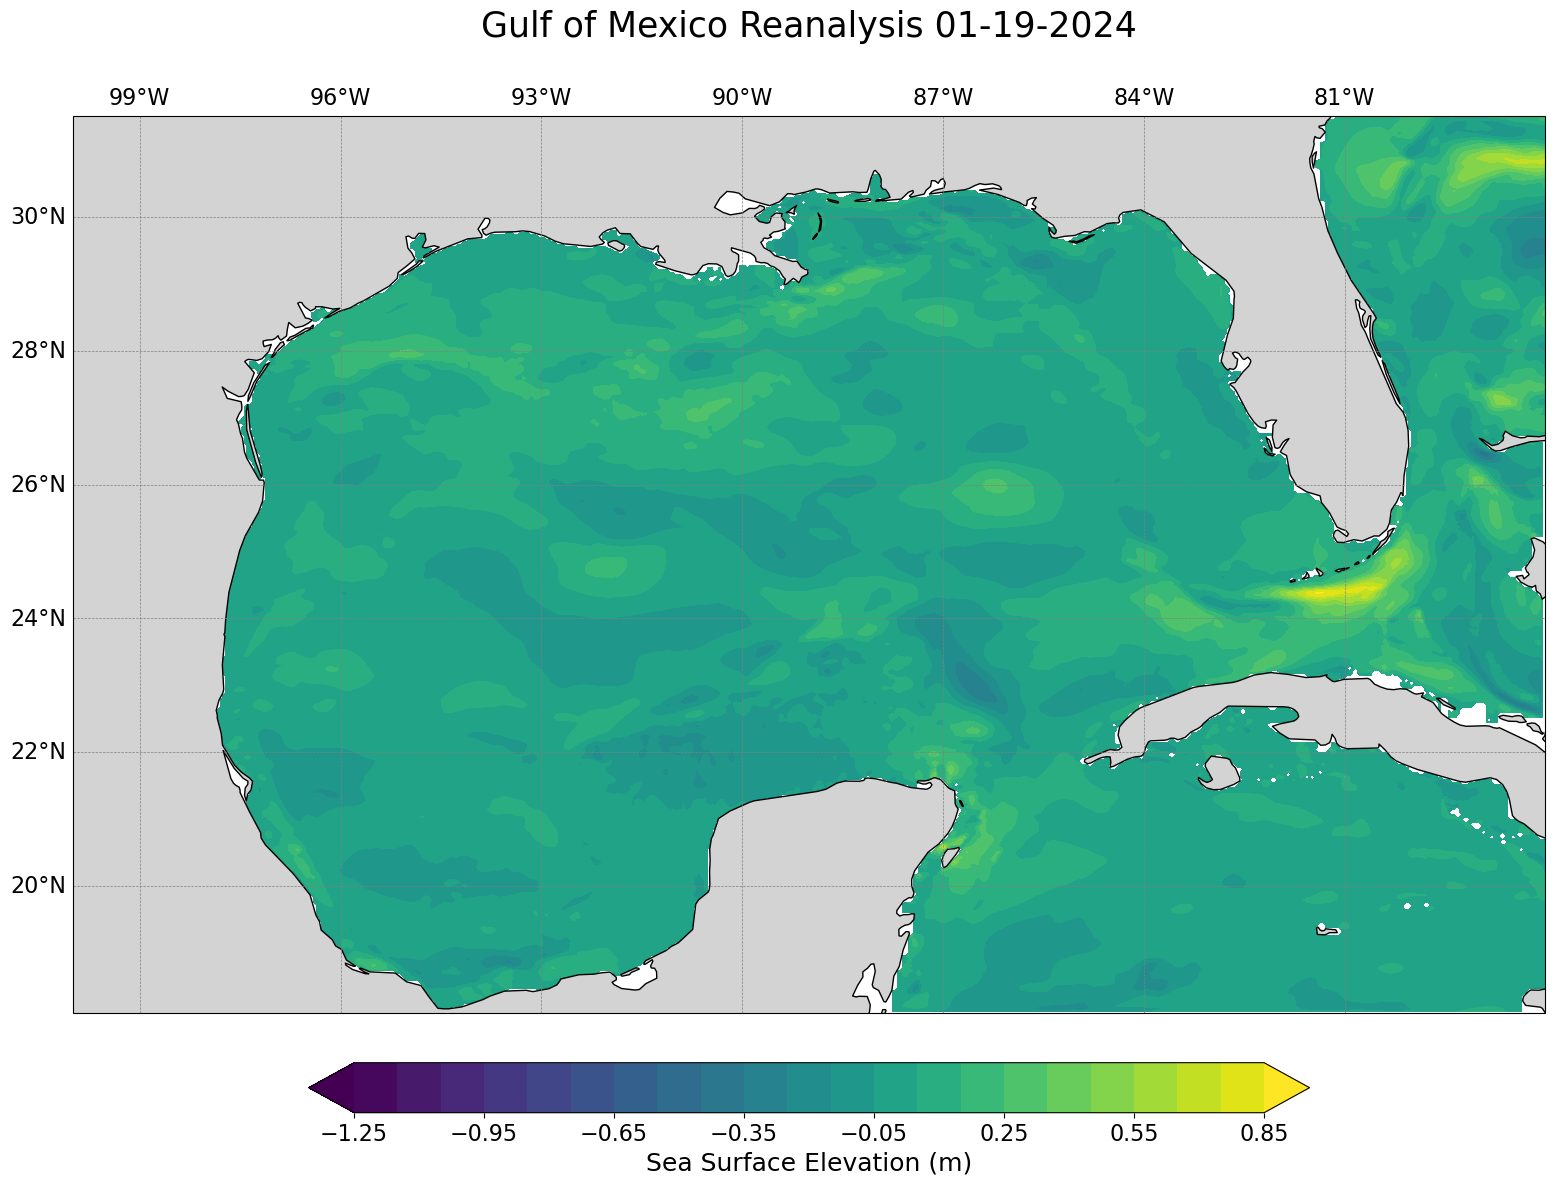

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_008_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


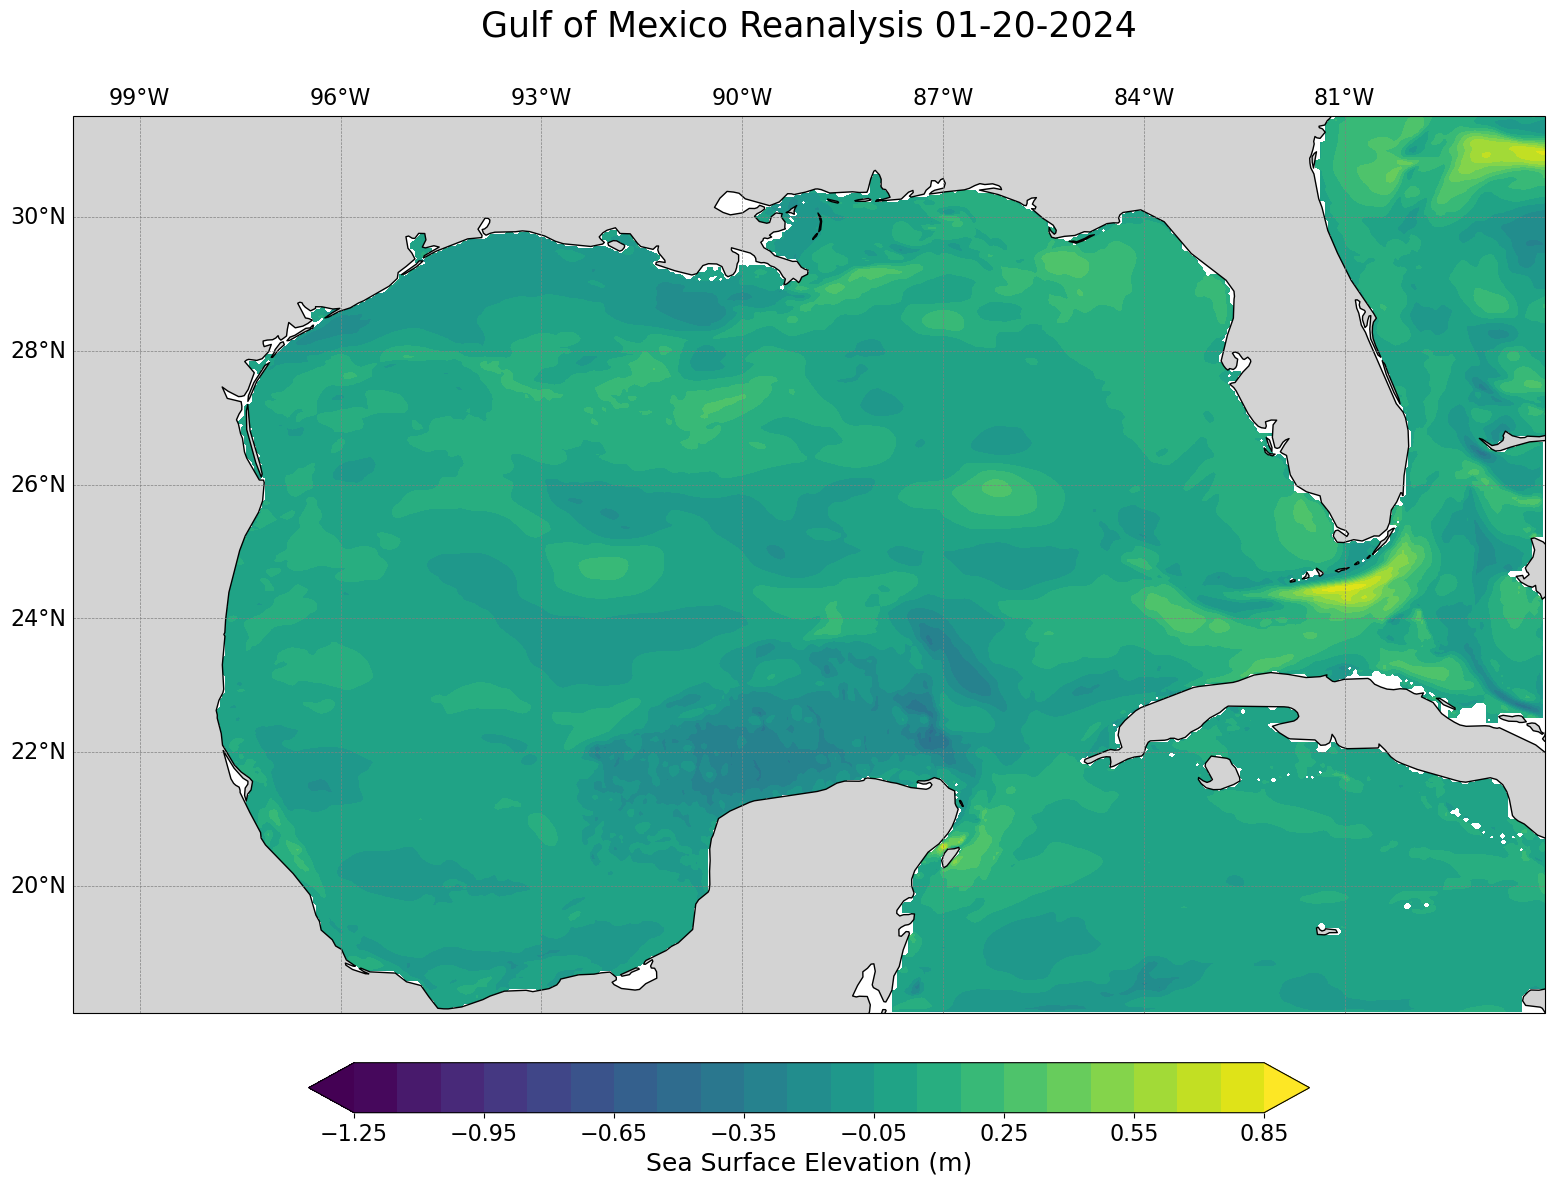

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_009_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


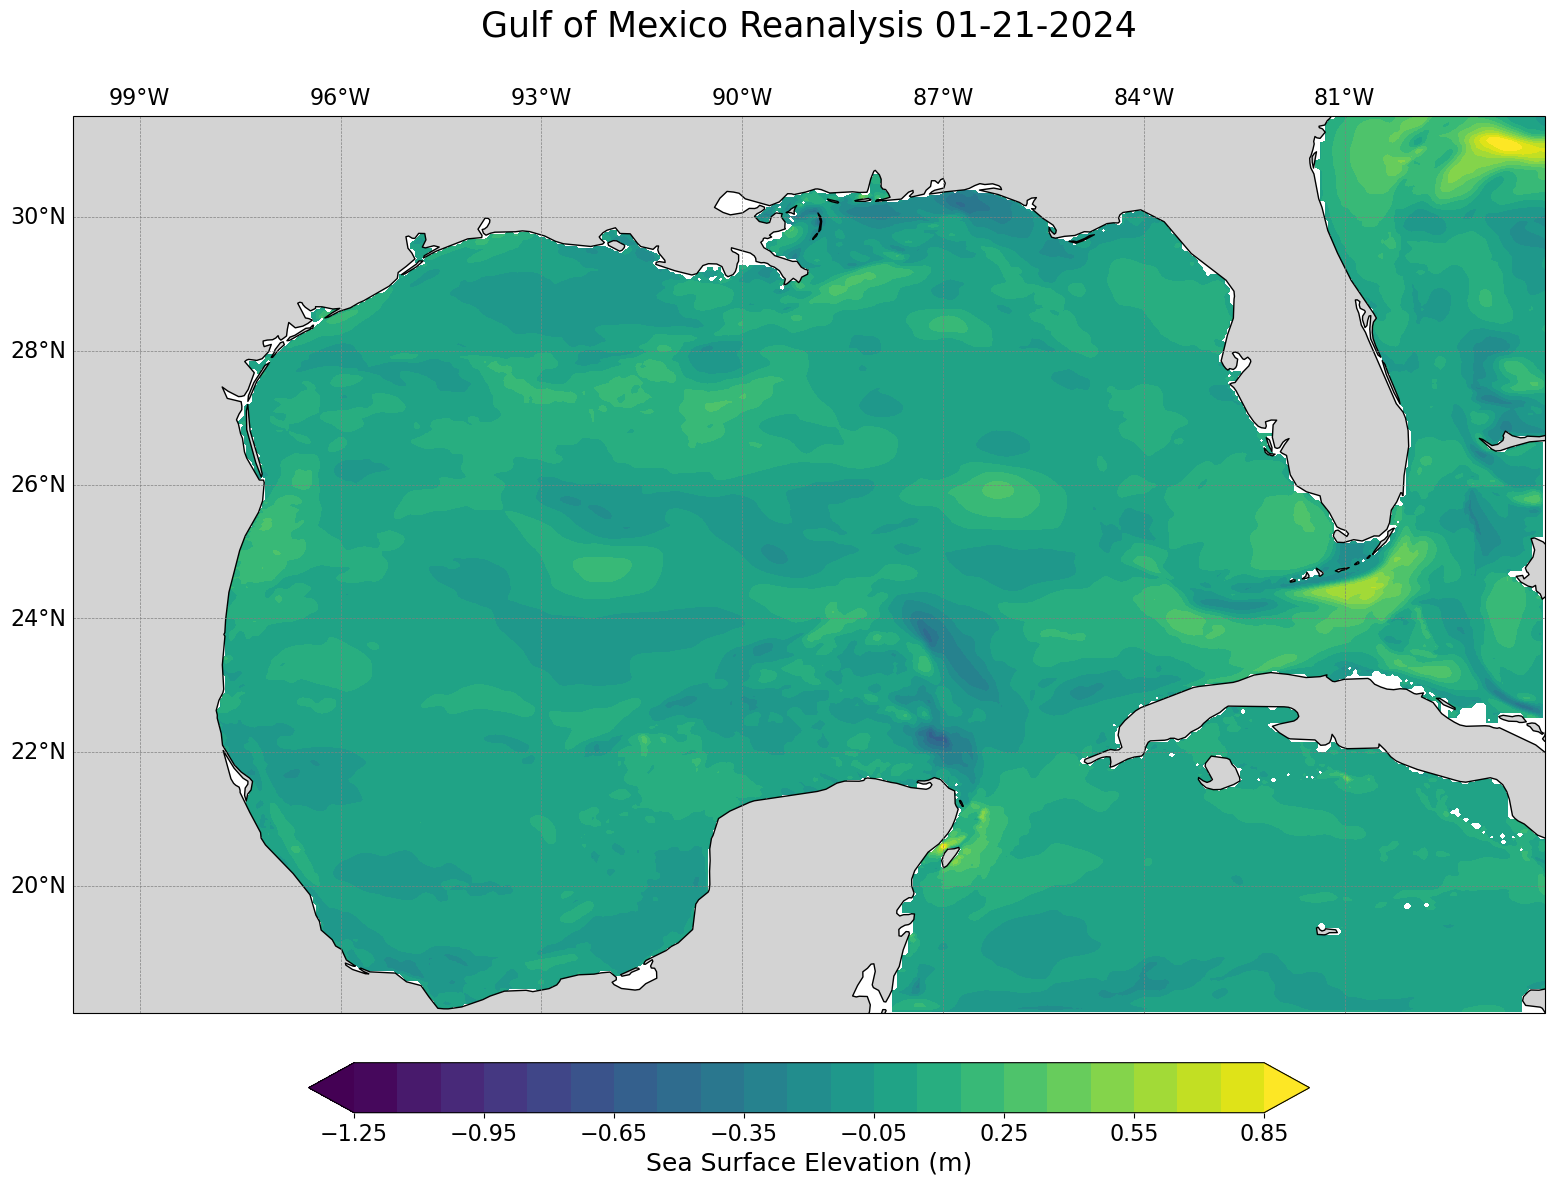

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_010_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


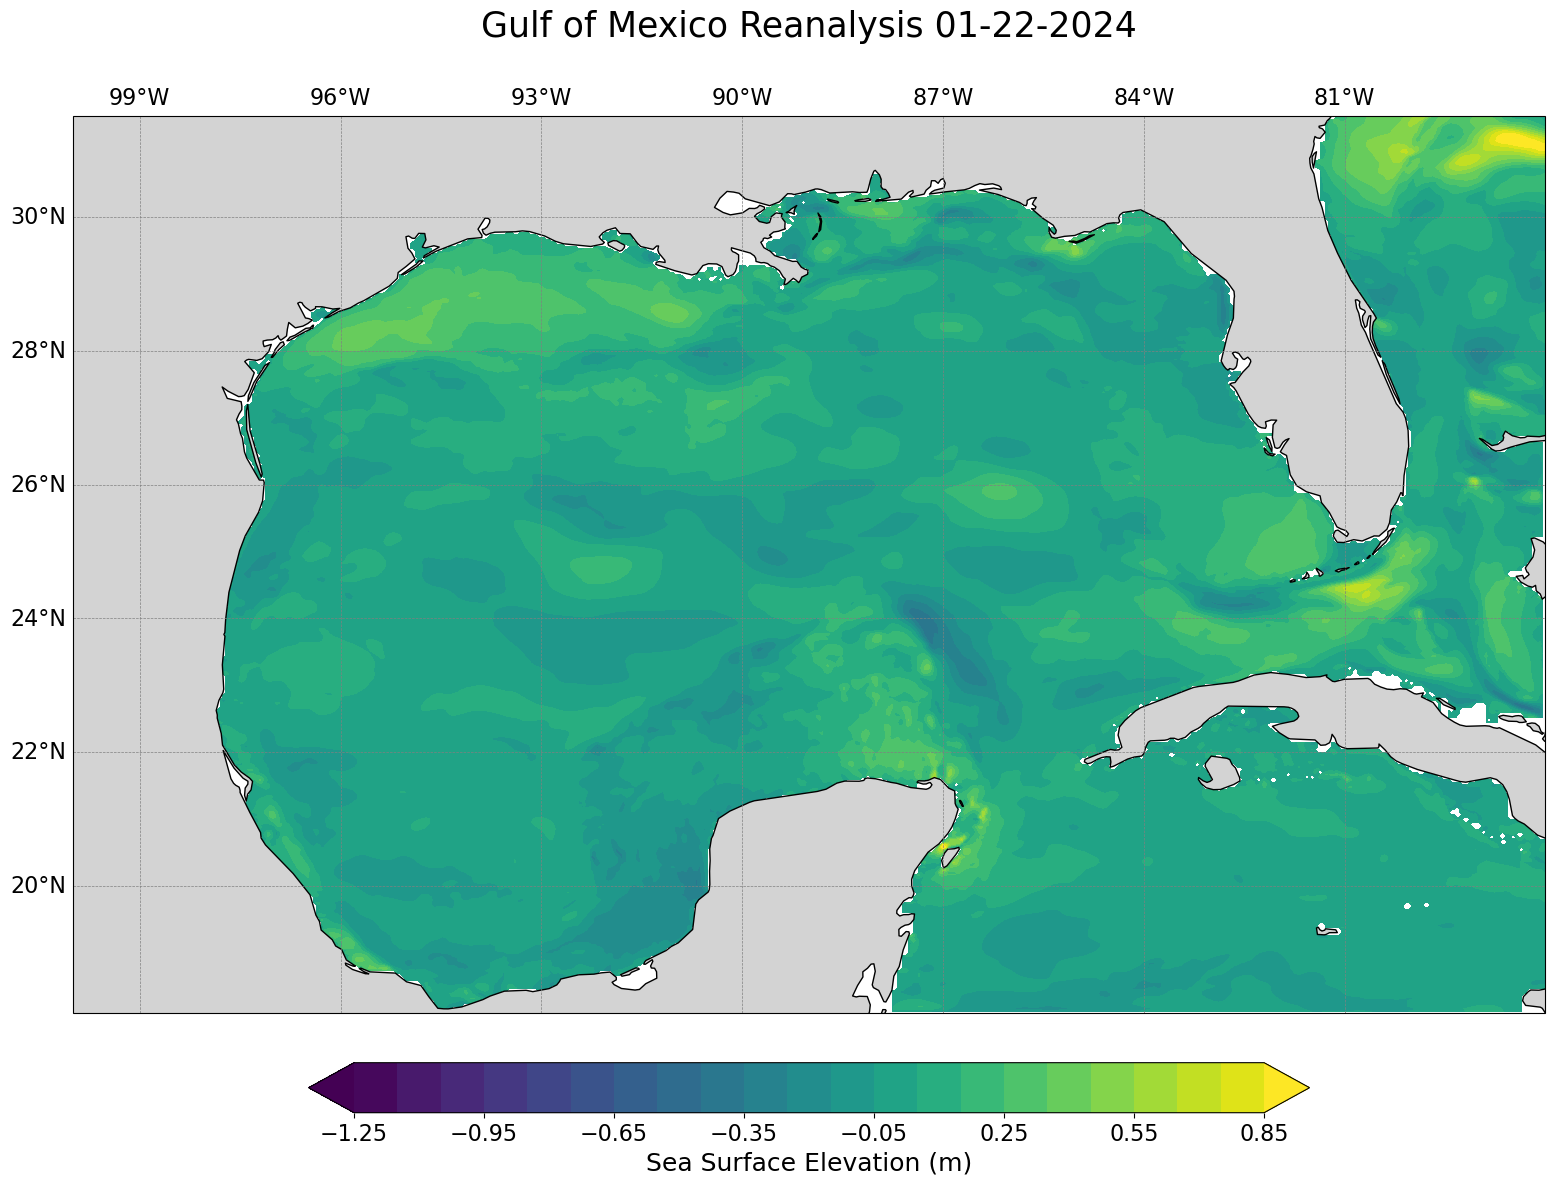

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_011_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


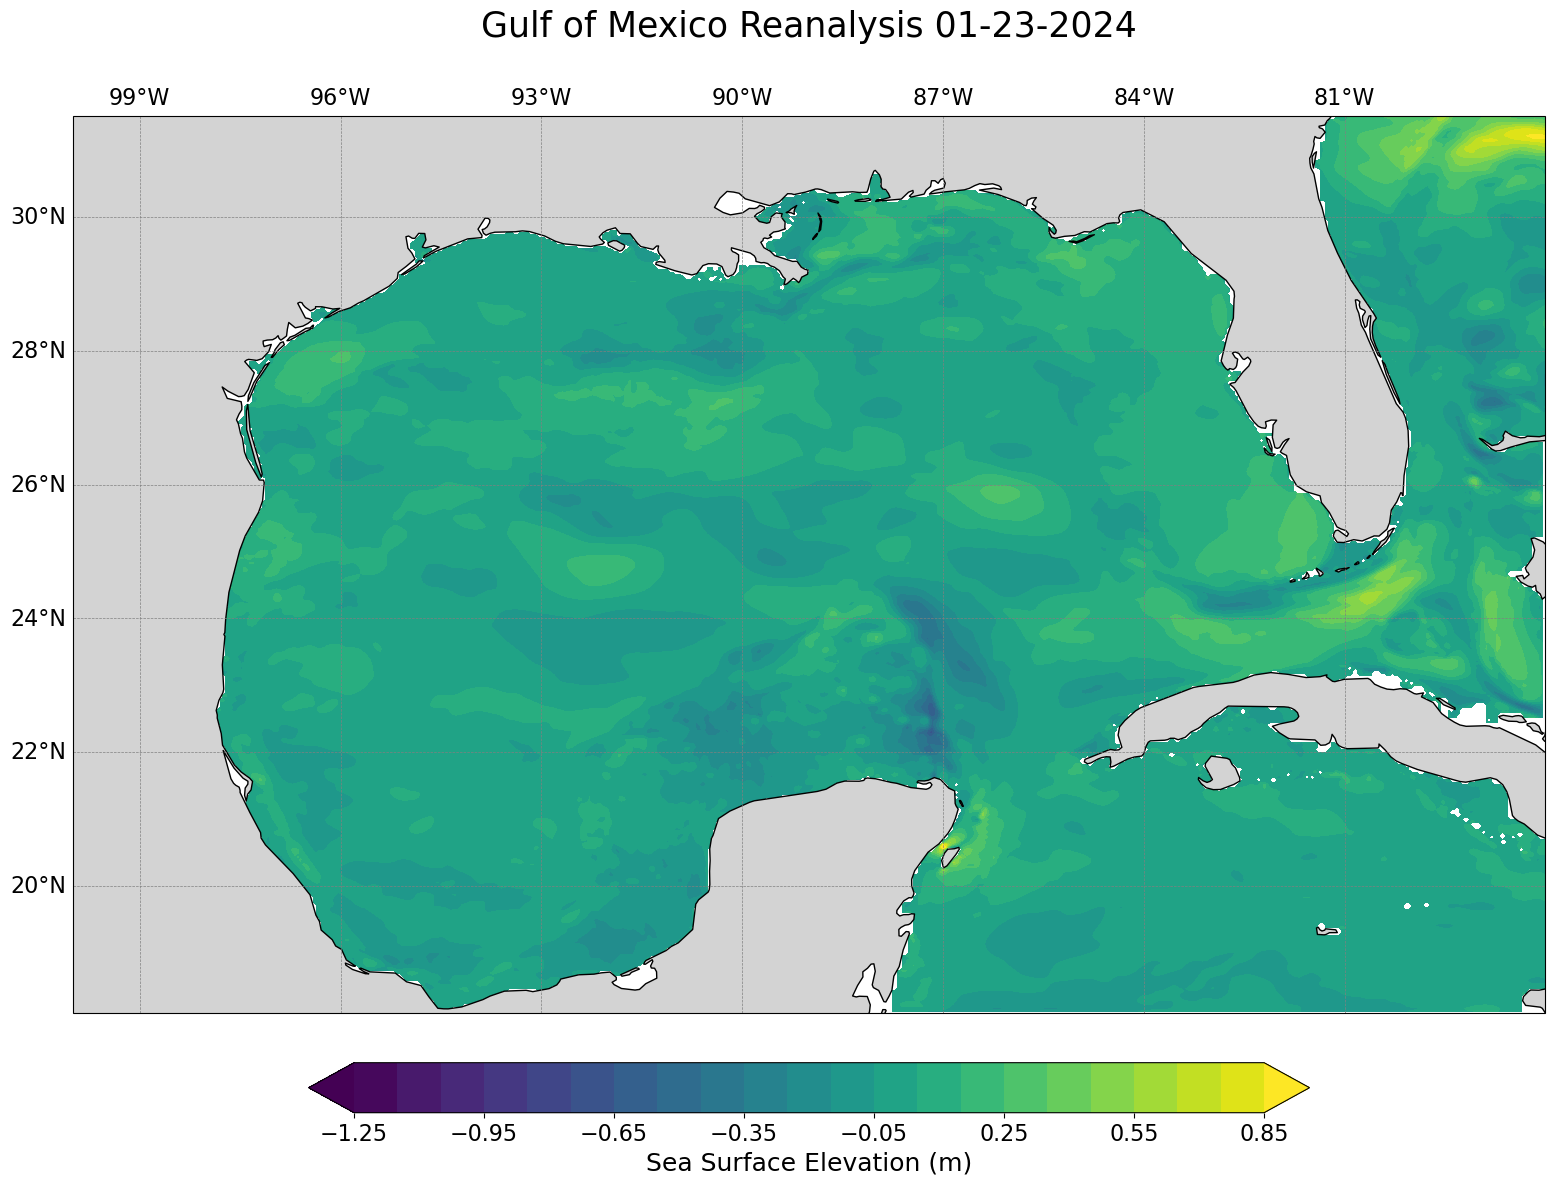

https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_012_01_2d.nc


C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\tamai\anaconda3\envs\ocs4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


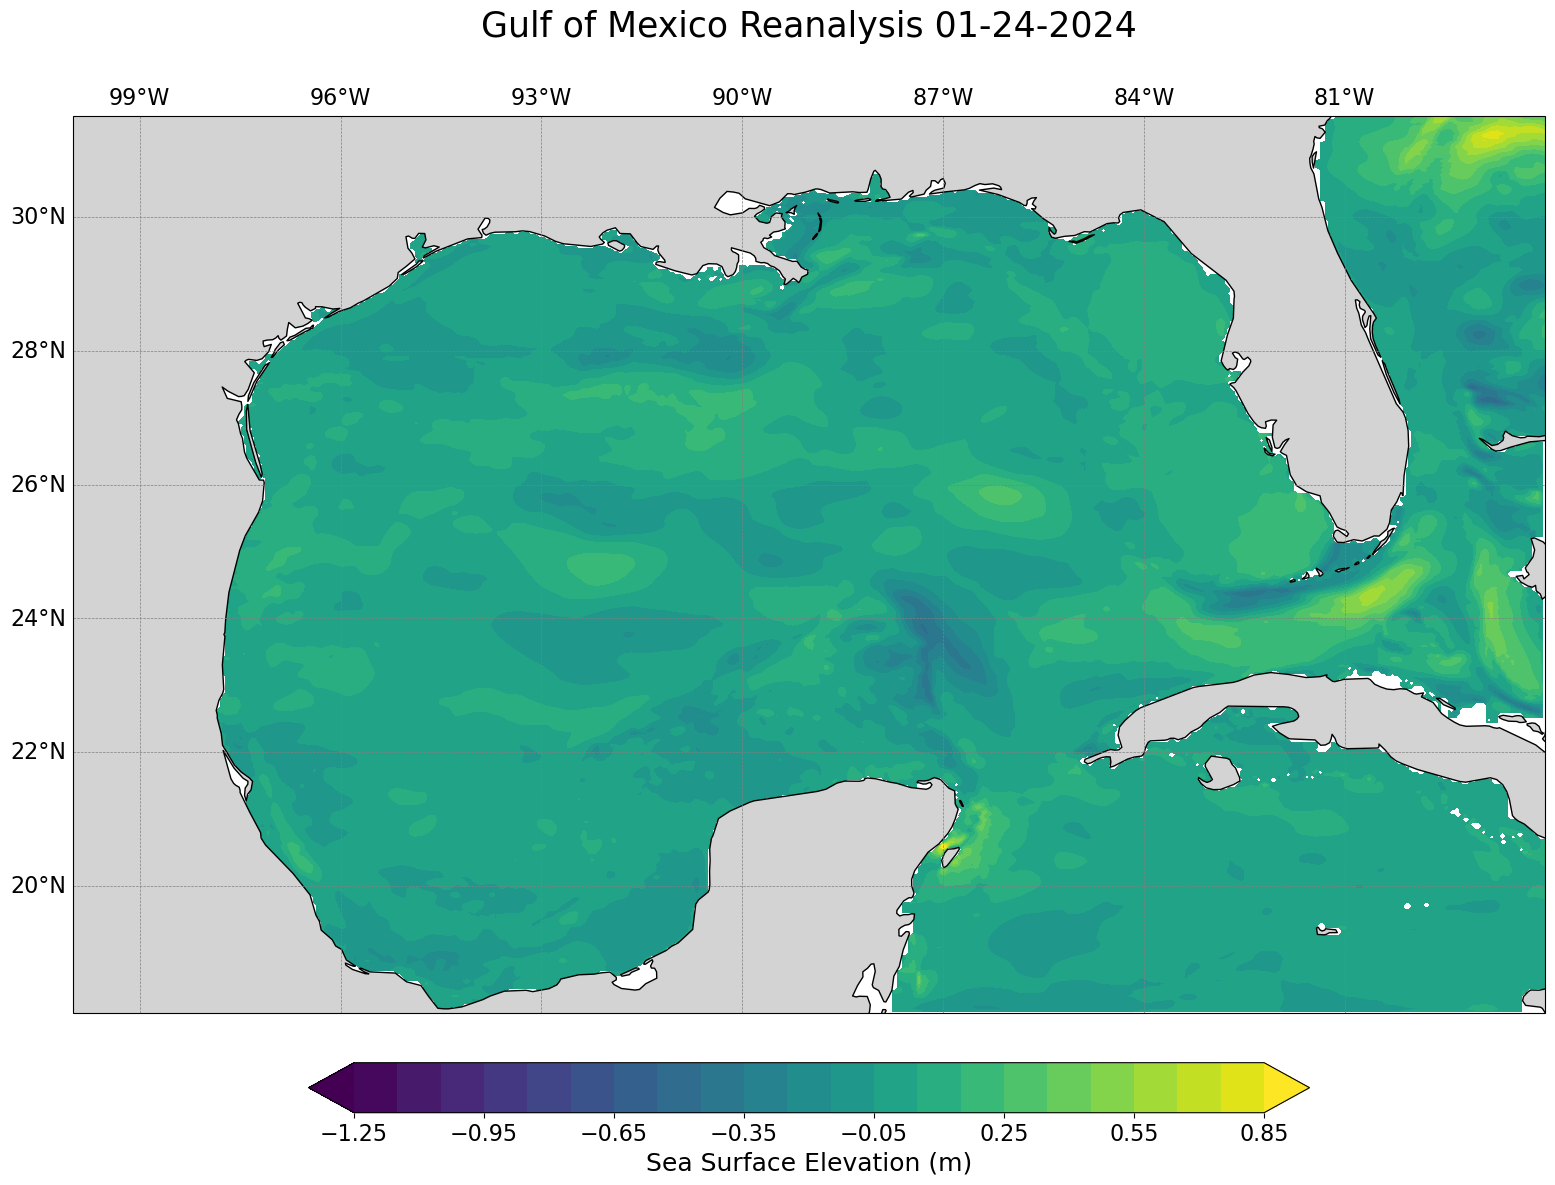

In [50]:
# We start off by looping through the amount of days we want to plot
for date_index in range(1,number_of_days+1):
    #Open open the data for the day that we are looking at 
    link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2024/035_archv.2024_"+str(date_index).zfill(3)+"_01_2d.nc"
    data = xr.open_dataset(link, decode_times=False)
    print(link)

    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([260,282, 18.11, 31.5])

    #set variables from the data that will be plotted onto the map
    var = data.u_barotropic_velocity[0,:,:] 
    x, y =data.Longitude, data.Latitude

    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels,extend='both')#,N=7)

    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05,extend='bith')
    cbar.set_label("barotropic_eastward_sea_water_velocity m/s", size = 18)

        #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)

    #Sets the graph title and format the size and location of the title
    ax.set_title('Gulf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)

        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
   
    #Save the plot in the given location and name, with the extension of the date
    fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', dpi = 500)
 
    
    #Increment the date, as we go through to the next file so it matches up with the correct time
    date = date + timedelta(days=1)

In [34]:
data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
  * MT                     (MT) float64 4.494e+04
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM
    source:                          HYCOM archive file
    experiment:                      01.0
    comment:                         p-grid
    history:                         Wed Mar 13 13:38:06 2024: ncks -x -v sur...
    history_of_appended_files:       Wed Mar 13 13:38:06 2024: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT